# Billboard Top 100: Through the Decades (1965-2015)

In [403]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn-darkgrid')

import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from gensim import corpora, models

import nltk

from helper import *

In [16]:
def top_20_words(fitted_and_transformed, feature_names):
    plt.subplots(dpi=300)
    sns.set(font_scale=.8)

    sorted_words = sorted(list(zip(feature_names, 
                                   np.asarray(fitted_and_transformed.sum(axis=0)).ravel())), 
                               key=lambda x: x[1], reverse=True)
    words, count = [i[0] for i in sorted_words], [i[1] for i in sorted_words]
    return words[:20], count[:20]

def plot_top_20(words, count, decade):
    top_words = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
    plt.title('Word Count From Songs of the '+ str(decade) + 's')
    sns.barplot(x = top_words['Count'], y=top_words['Word'], palette=("GnBu_d"));

def NMF_topics(lyrics, num_topics, num_words, change_max_df=0.95, change_min_df=2):
    vectorizer = TfidfVectorizer(max_df=change_max_df, min_df=change_min_df, stop_words=stop)
    tfidf = vectorizer.fit_transform(lyrics)
    tfidf_fn = vectorizer.get_feature_names()
    NMF_model = NMF(n_components=num_topics, random_state=1, init='nndsvd').fit(tfidf)
    show_sk_topics(NMF_model, tfidf_fn, num_words)
    
#Found this online
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:20]:
        print("{0:10} Score: {1}".format(item[0], item[1]))

----

# The Data

In [4]:
lyrics = pd.read_csv('billboard.csv', encoding = "latin1")
lyrics.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


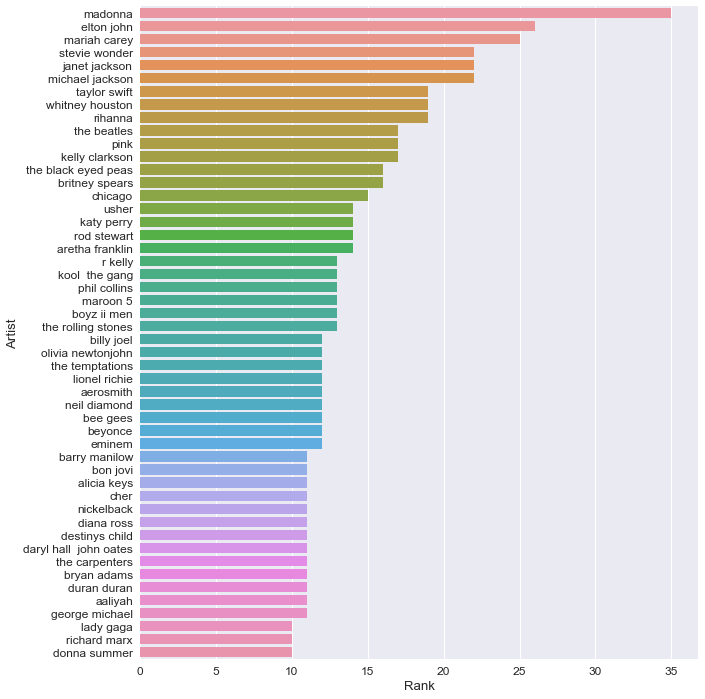

In [5]:
plt.figure(figsize=(10, 12))
sns.set(font_scale=1.2)
artist = lyrics.groupby('Artist').count()
num_b = artist.sort_values('Rank', ascending=False)[:50]

sns.barplot(y=num_b.index, x=num_b['Rank'], orient='h', order=num_b.index);

In [6]:
from sklearn.feature_extraction import stop_words

more_stop_words = set(['im', 'like', 'it', 'dont', 'aint', 'ive', 'ill', 
                       'wont', 'gonna', 'youre','just','got','theres',
                       'let','oh', 'come', 'want', 'good','make', 'cause',
                       'shes', 'hes', 'lets', 'theyll', 'youll', 'youve',
                       'id', 'thats', 'way', 'wanna', 'know', 'imma', 'theyre'])
stop = stop_words.ENGLISH_STOP_WORDS.union(more_stop_words)

----
## Through the Decades

## 1965-1969

Implementing a topic model for the years 1965-1969, the first decade in this analysis.

In [11]:
decade1lyrics = lyrics[lyrics['Year'] < 1970]['Lyrics'].values
decade1lyrics = [i for i in decade1lyrics if type(i) == str] #Handle NaN values.

#tfidf1_vectorizer = TfidfVectorizer(max_df=0.25, min_df=2, stop_words=stop)
#tfidf1 = tfidf_vectorizer.fit_transform(decade1lyrics)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

count_vec1 = CountVectorizer(max_df=0.65, min_df=2, stop_words=stop)
cv1 = count_vec1.fit_transform(decade1lyrics)
cv_fn1 = count_vec1.get_feature_names()

decade1LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=29, 
                                       learning_decay=.7,
                                       max_iter=130,
                                       learning_method='online').fit(cv1)

show_sk_topics(decade1LDA, cv_fn1, 15)

Topic 0:
yeah day happy home comes place soul hair away gotta alright washed black say right
Topic 1:
love baby need time tell say think heart mind world sweet hold help life girl
Topic 2:
na rain bop sky send blue red yellow fly lady coal sound bang going jean
Topic 3:
girl say mony proud bad everybody feel time does summer mess rollin count sunshine stone
Topic 4:
la hey little man dig bit ha baby da song play dance new whats real
Topic 5:
long night love lovin gone wait gimme away lonely light believe time eyes laughing look


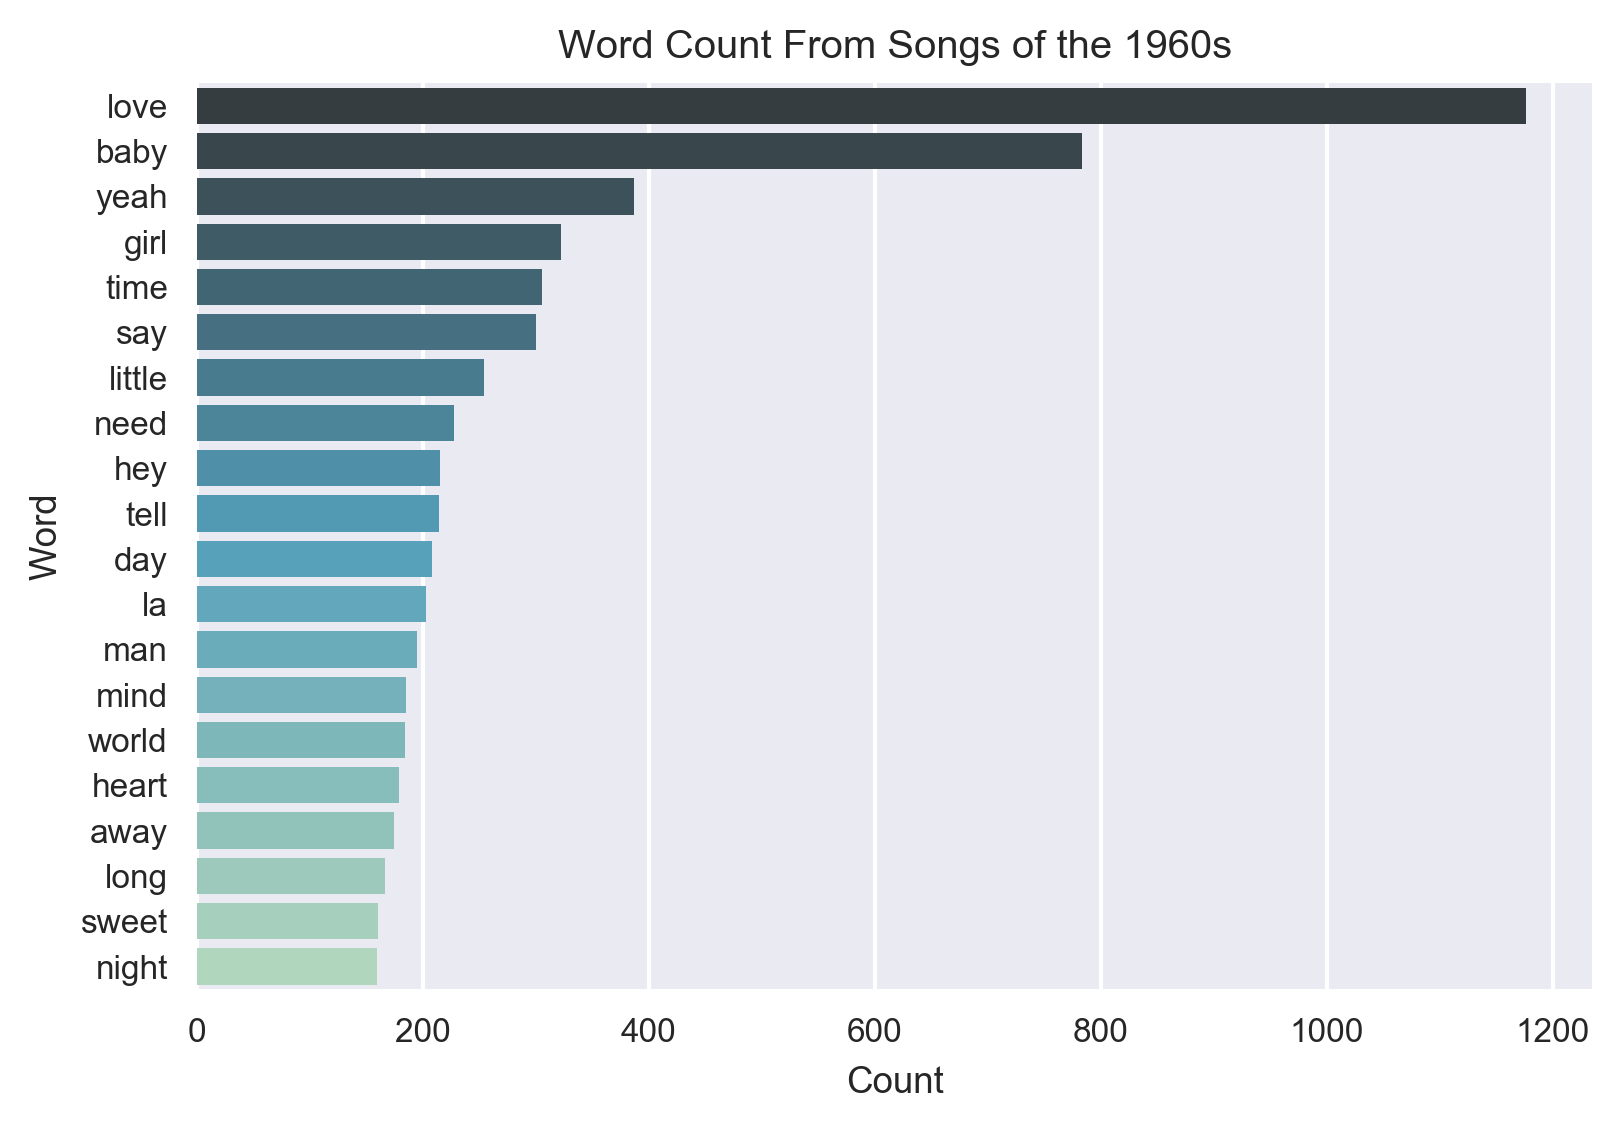

In [17]:
words1, count1 = top_20_words(cv1, cv_fn1)
plot_top_20(words1, count1, 1960)

In [68]:
from matplotlib import cm

donut_plot_colors = [i for i in cm.GnBu(np.arange(0, 255, 12))][::-1]

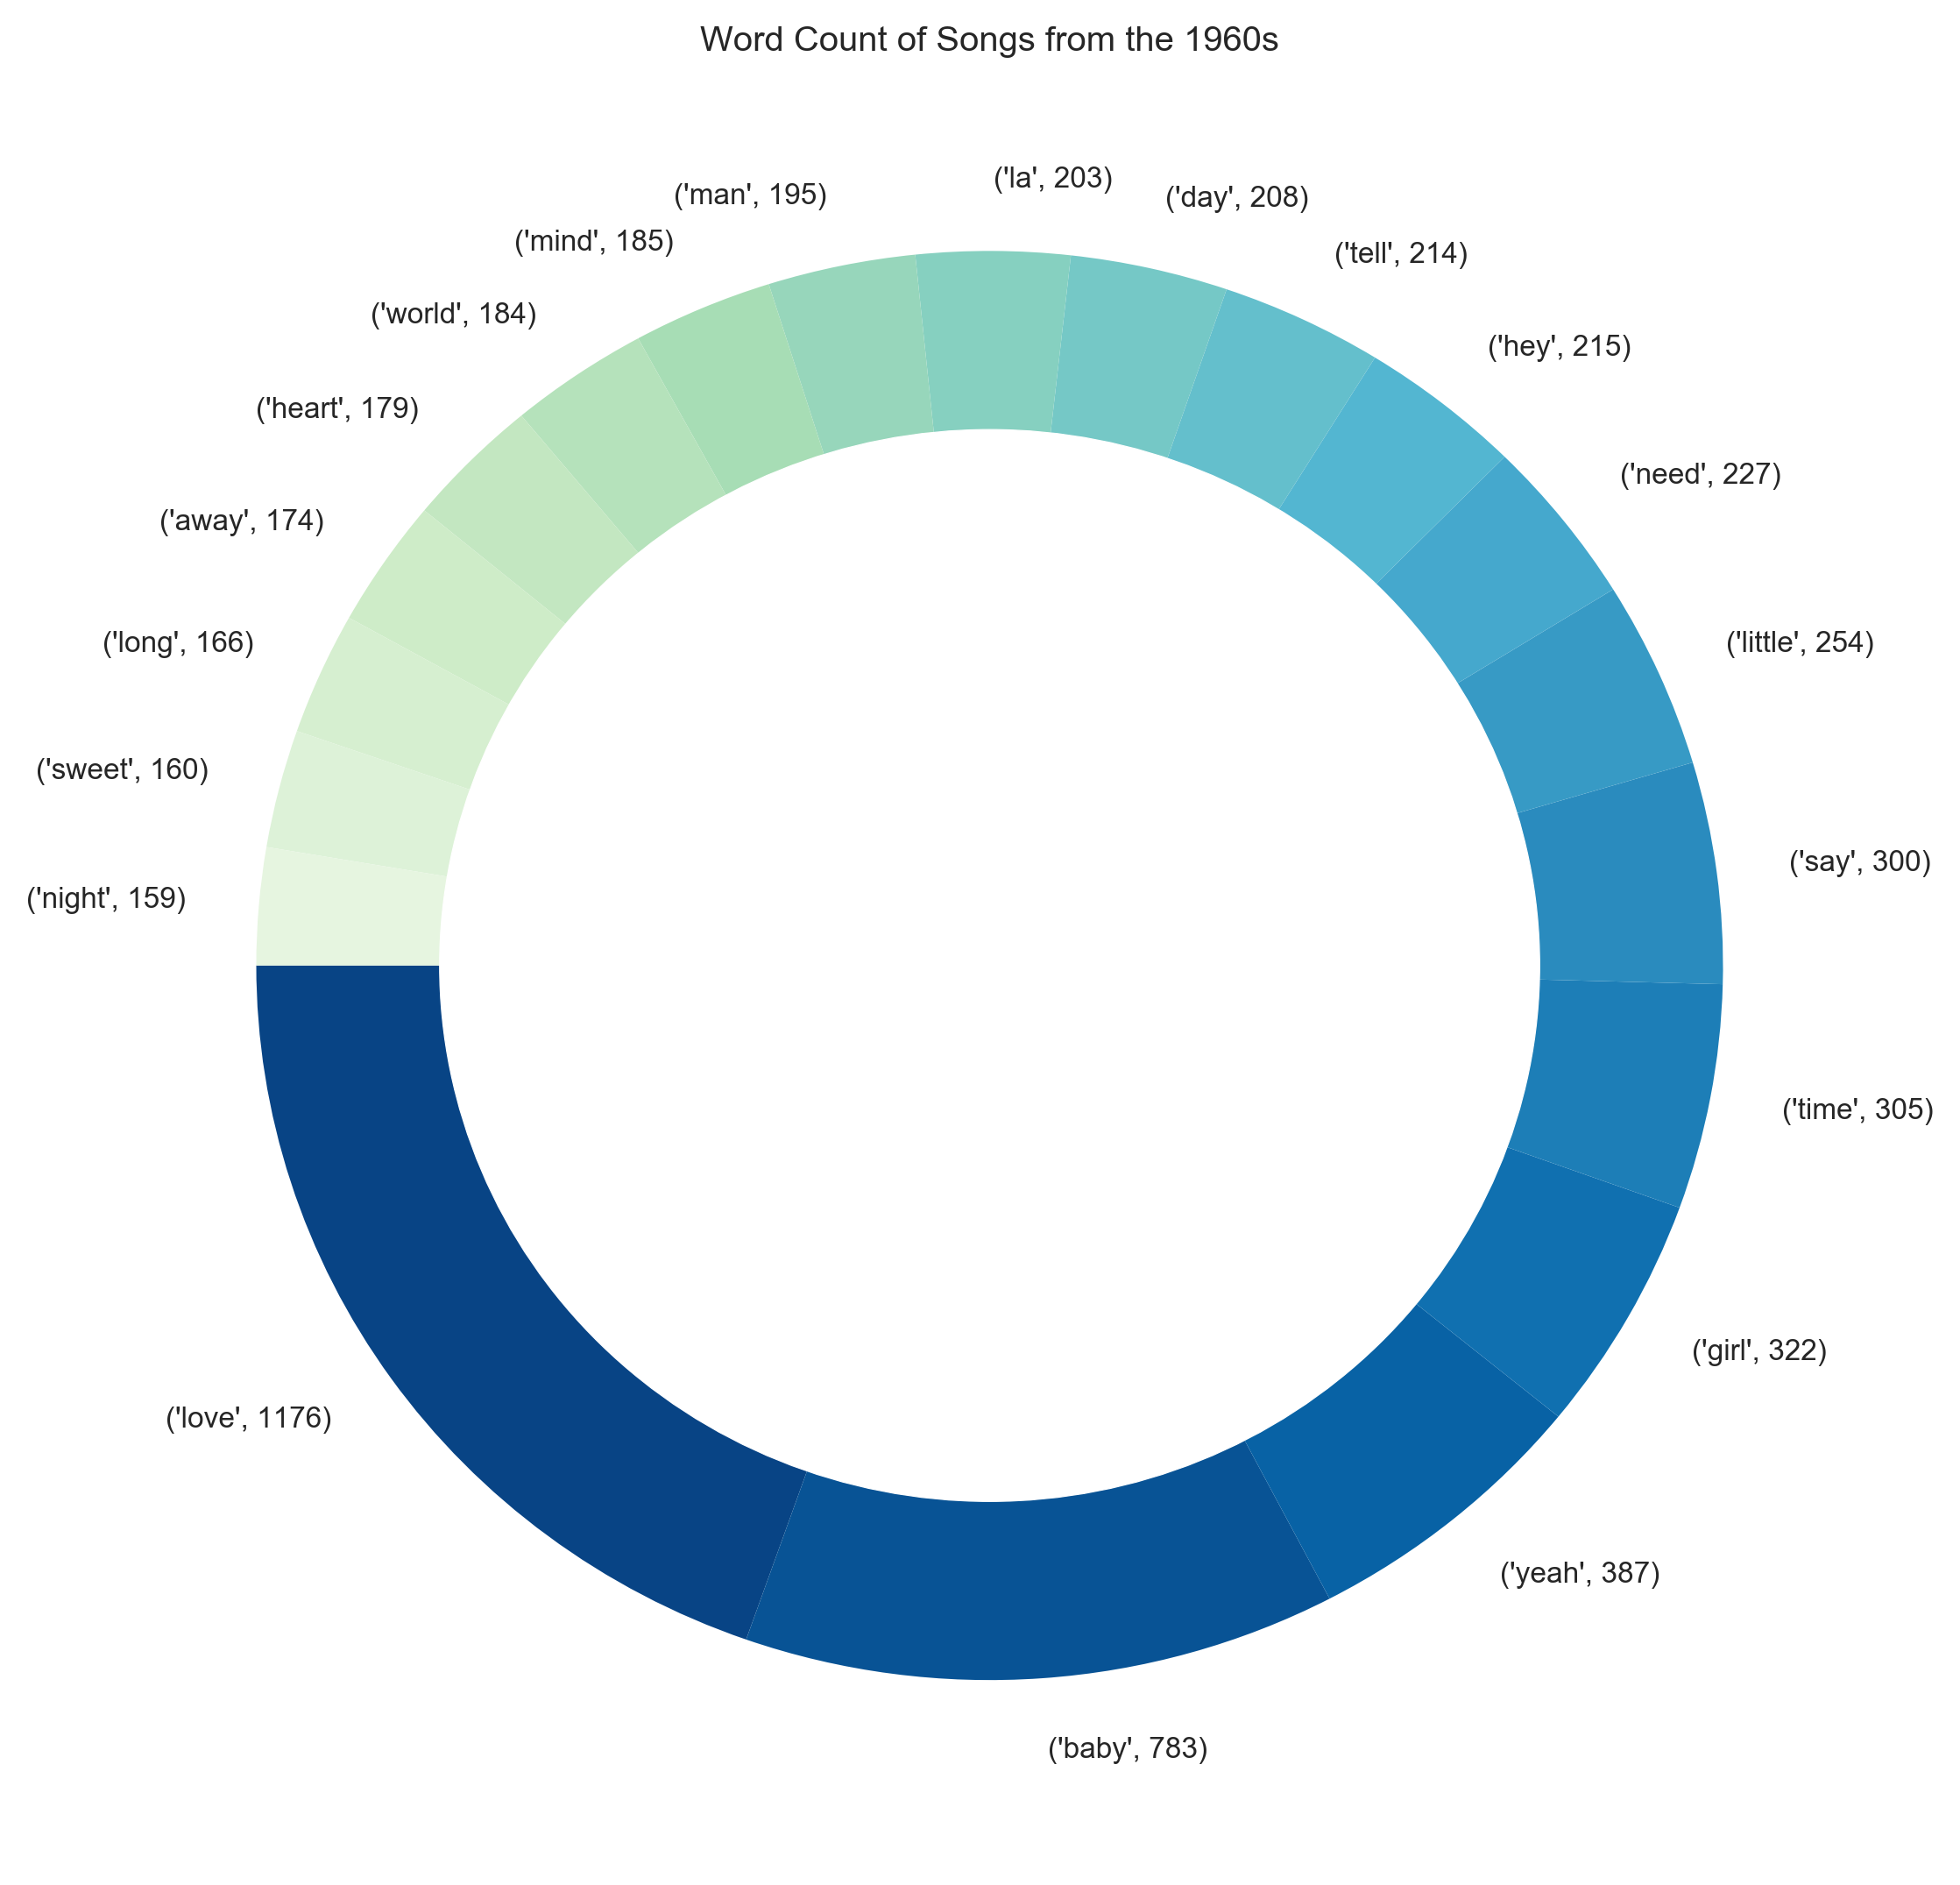

In [93]:
plt.figure(dpi=300, figsize=(9, 9))
my_circle=plt.Circle((0,0), 0.75, color='white')
plt.pie(count1, labels=list(zip(words1, count1)), colors=donut_plot_colors, startangle=180)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Word Count of Songs from the 1960s')
plt.show()

----
## 1970-1979

In [90]:
decade2lyrics = lyrics[lyrics['Year'].between(1970, 1979, inclusive=True)]['Lyrics'].values
decade2lyrics = [i for i in decade2lyrics if type(i) == str]

count_vec2 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv2 = count_vec2.fit_transform(decade2lyrics)
cv_fn2 = count_vec2.get_feature_names()

decade2LDA = LatentDirichletAllocation(n_components=5, 
                                       batch_size=50, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv2)

show_sk_topics(decade2LDA, cv_fn2, 15)

Topic 0:
time away night right gone long home life day hear new people doo left man
Topic 1:
sweet high rock light music yes roll sing thing sky makin groove song ready wonder
Topic 2:
love baby feel say ooh need yeah tell little girl time right stop heart hold
Topic 3:
yeah said woman shake man hot bring girl easy em boy say everybody tell lord
Topic 4:
dance la boogie da ya night dancing gimme funk little hey lady somebody disco yeah


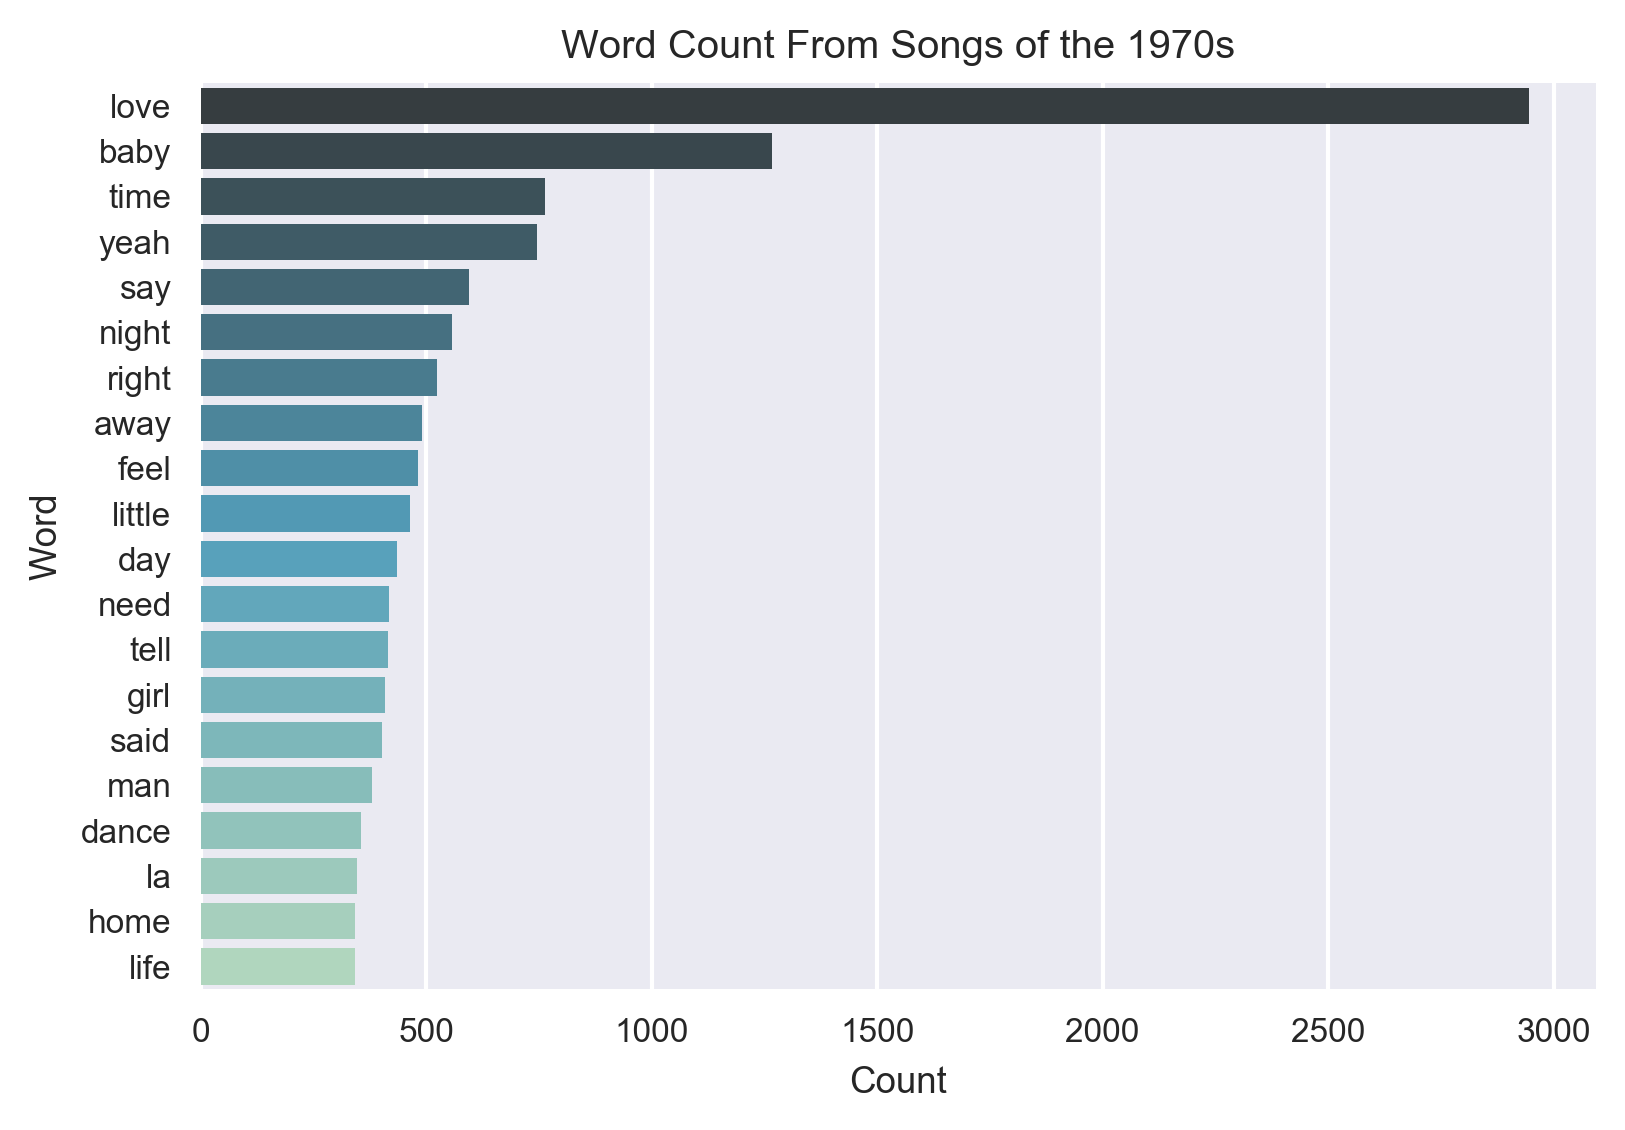

In [92]:
words2, count2 = top_20_words(cv2, cv_fn2)
plot_top_20(words2, count2, 1970)

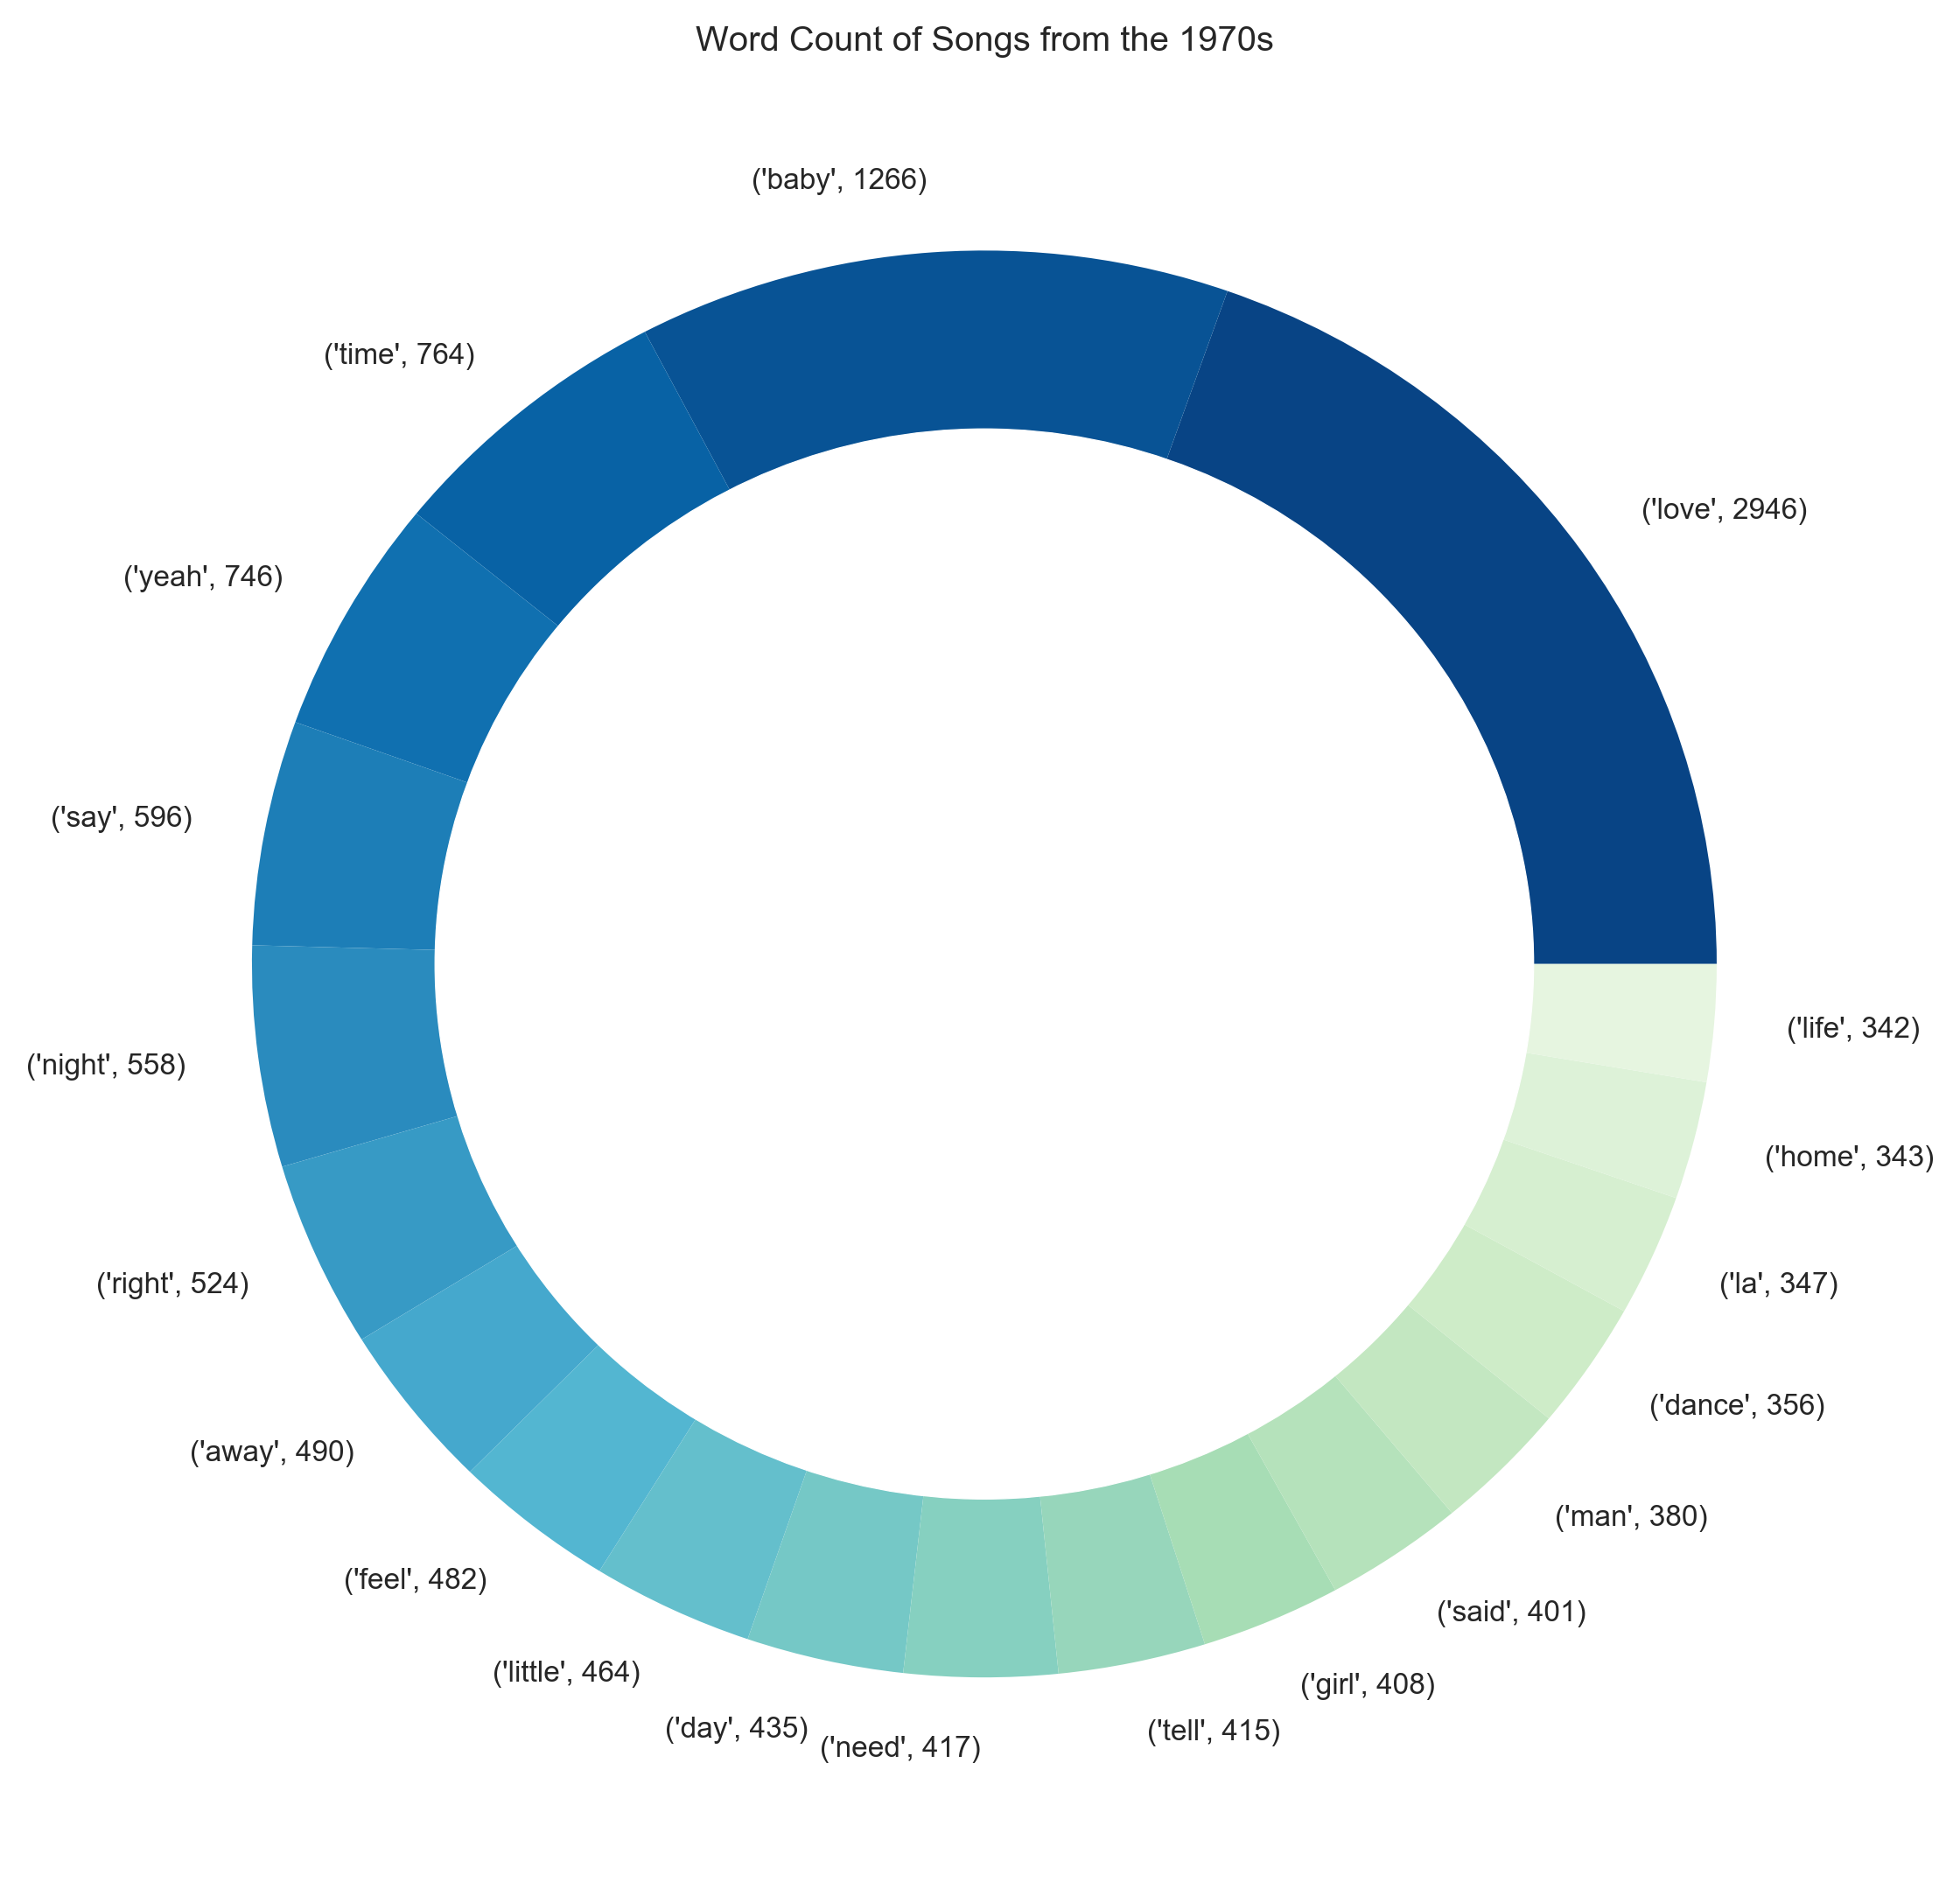

In [102]:
def plot_donut(words, count, decade, starting_angle=0):
    plt.figure(dpi=300, figsize=(9, 9))
    my_circle=plt.Circle((0,0), 0.75, color='white')
    plt.pie(count1, labels=list(zip(words, count)), 
            colors=[i for i in cm.GnBu(np.arange(0, 255, 12))][::-1], 
            startangle=starting_angle)
    donut=plt.gcf()
    donut.gca().add_artist(my_circle)
    plt.title('Word Count of Songs from the ' + str(decade) +'s')
    plt.show()
plot_donut(words2, count2, 1970)

----

## 1980-1990

In [98]:
decade3lyrics = lyrics[lyrics['Year'].between(1980, 1989, inclusive=True)]['Lyrics'].values
decade3lyrics = [i for i in decade3lyrics if type(i) == str]

count_vec3 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv3 = count_vec3.fit_transform(decade3lyrics)
cv_fn3 = count_vec3.get_feature_names()

decade3LDA = LatentDirichletAllocation(n_components=4, 
                                       batch_size=6, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv3)

show_sk_topics(decade3LDA, cv_fn3, 15)

Topic 0:
tonight baby dance right rock night shake whos beat body roll wants man red everybody
Topic 1:
love time baby yeah say heart tell little ooh life long feel think need really
Topic 2:
na talk la new girls boys said uh wild city remember money live think hot
Topic 3:
night girl feel hold away eyes day world turn need look bad right stand dream


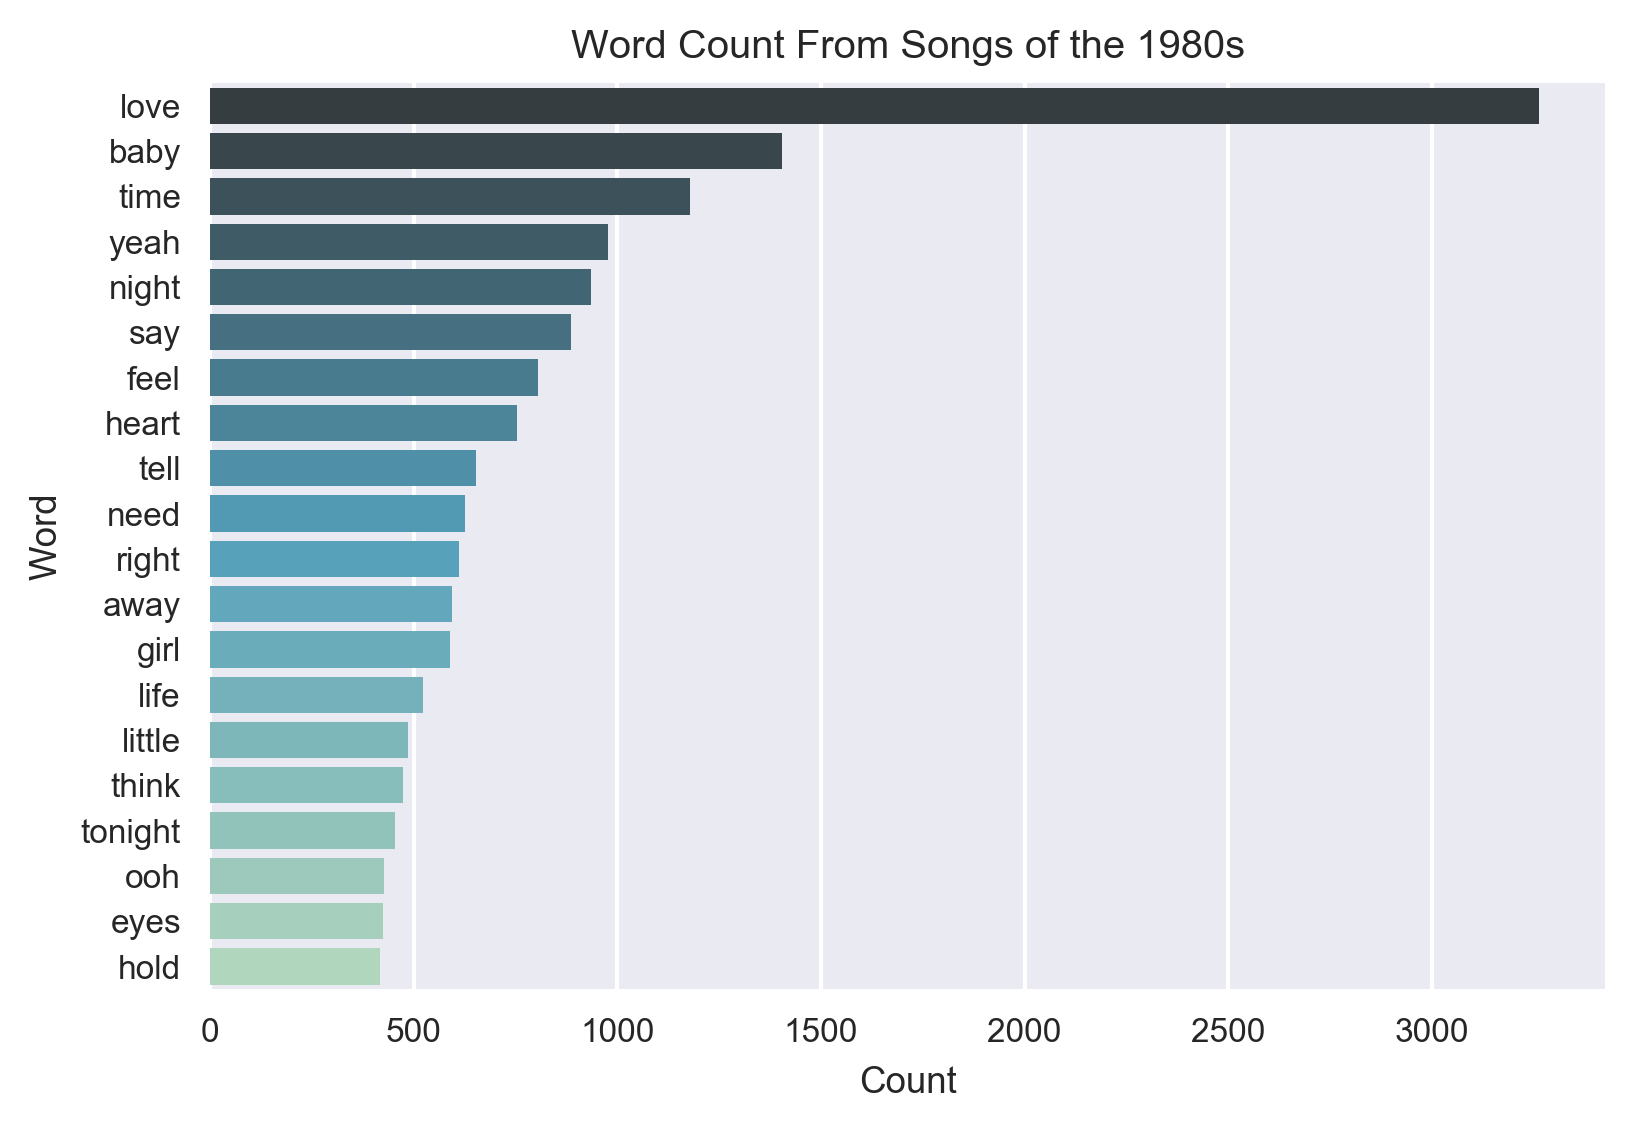

In [105]:
words3, count3 = top_20_words(cv3, cv_fn3)
plot_top_20(words3, count3, 1980)

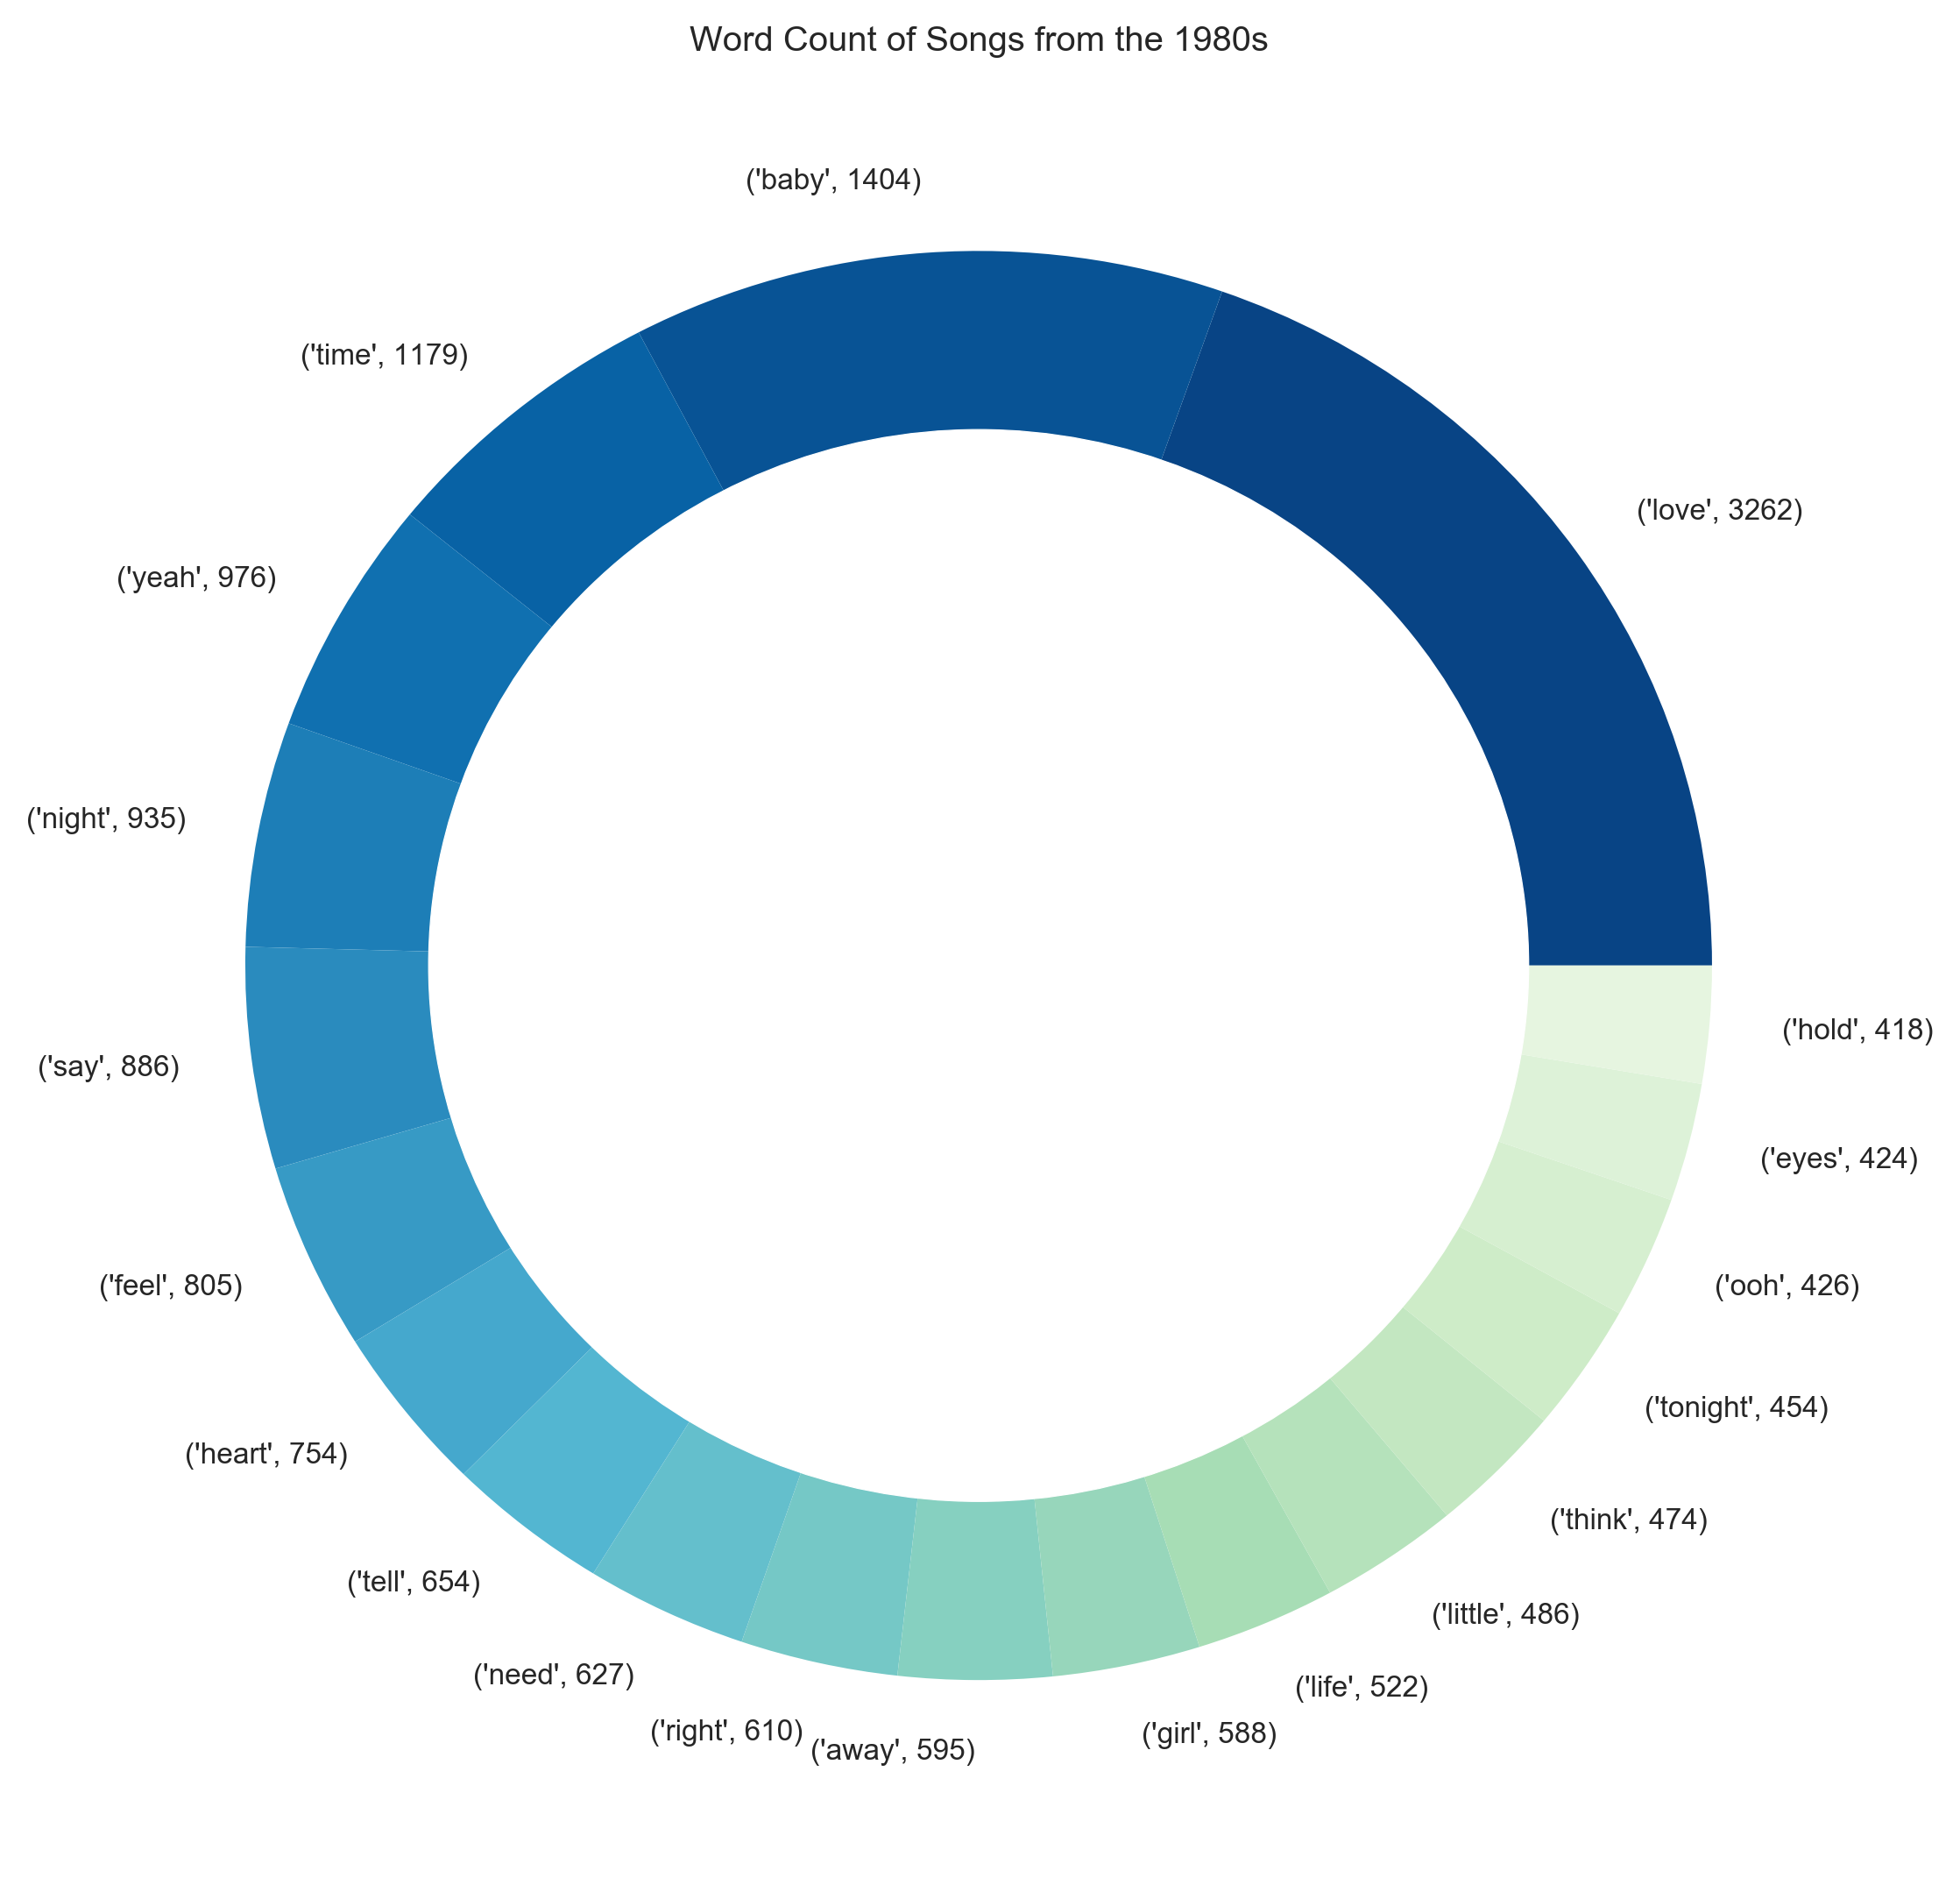

In [103]:
plot_donut(words3, count3, 1980)

----

## 1990-2000

In [107]:
decade4lyrics = lyrics[lyrics['Year'].between(1990, 1999, inclusive=True)]['Lyrics'].values
decade4lyrics = [i for i in decade4lyrics if type(i) == str]

count_vec4 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv4 = count_vec3.fit_transform(decade4lyrics)
cv_fn4 = count_vec3.get_feature_names()

decade4LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=45, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv4)

show_sk_topics(decade4LDA, cv_fn4, 15)

Topic 0:
time say away life heart said day think things hold love tell remember did hard
Topic 1:
da na real coming feel mmm bad nah la free di cruel huh boys lovers
Topic 2:
ya em yo jam yall ride shake roll shit niggaz money nigga play wit rock
Topic 3:
love heart night feel need baby forever believe true time say stay dream pump promise
Topic 4:
baby yeah girl need right tell love little time really body mind man feel think
Topic 5:
jump everybody power tu cuerpo alegria que macarena dah daddy se hey getting whip murderer


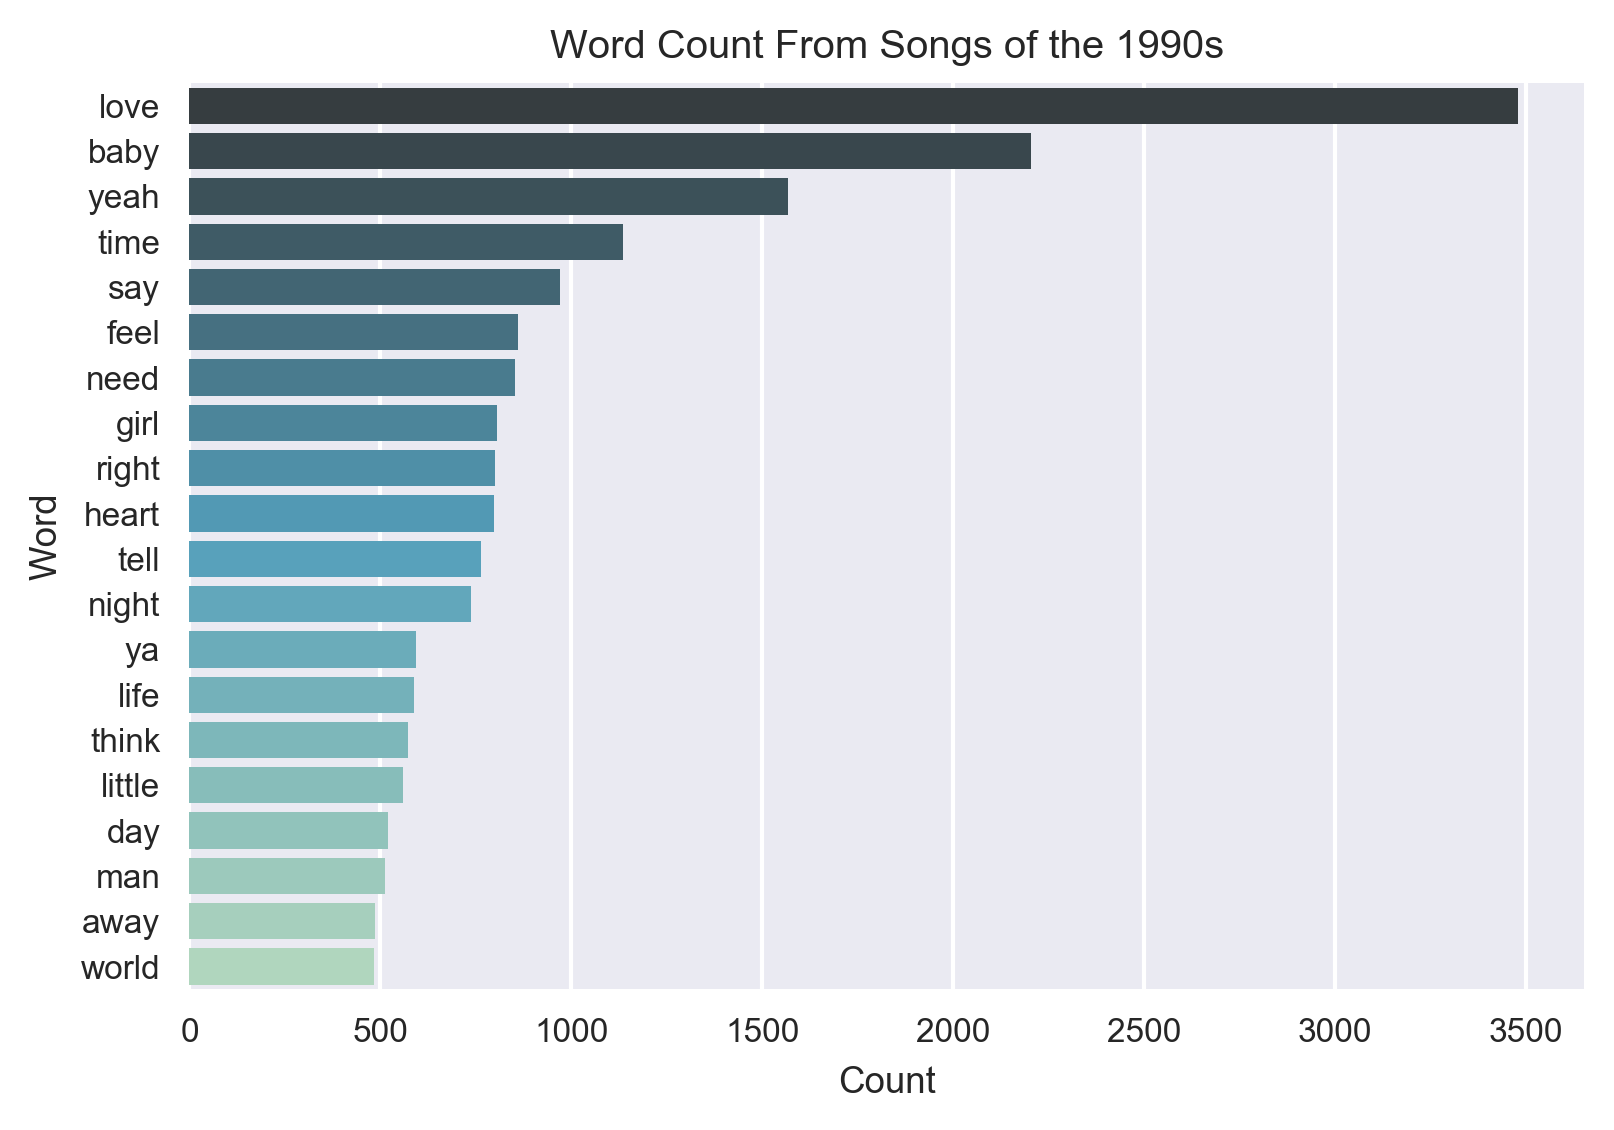

In [108]:
words4, count4 = top_20_words(cv4, cv_fn4)
plot_top_20(words4, count4, 1990)

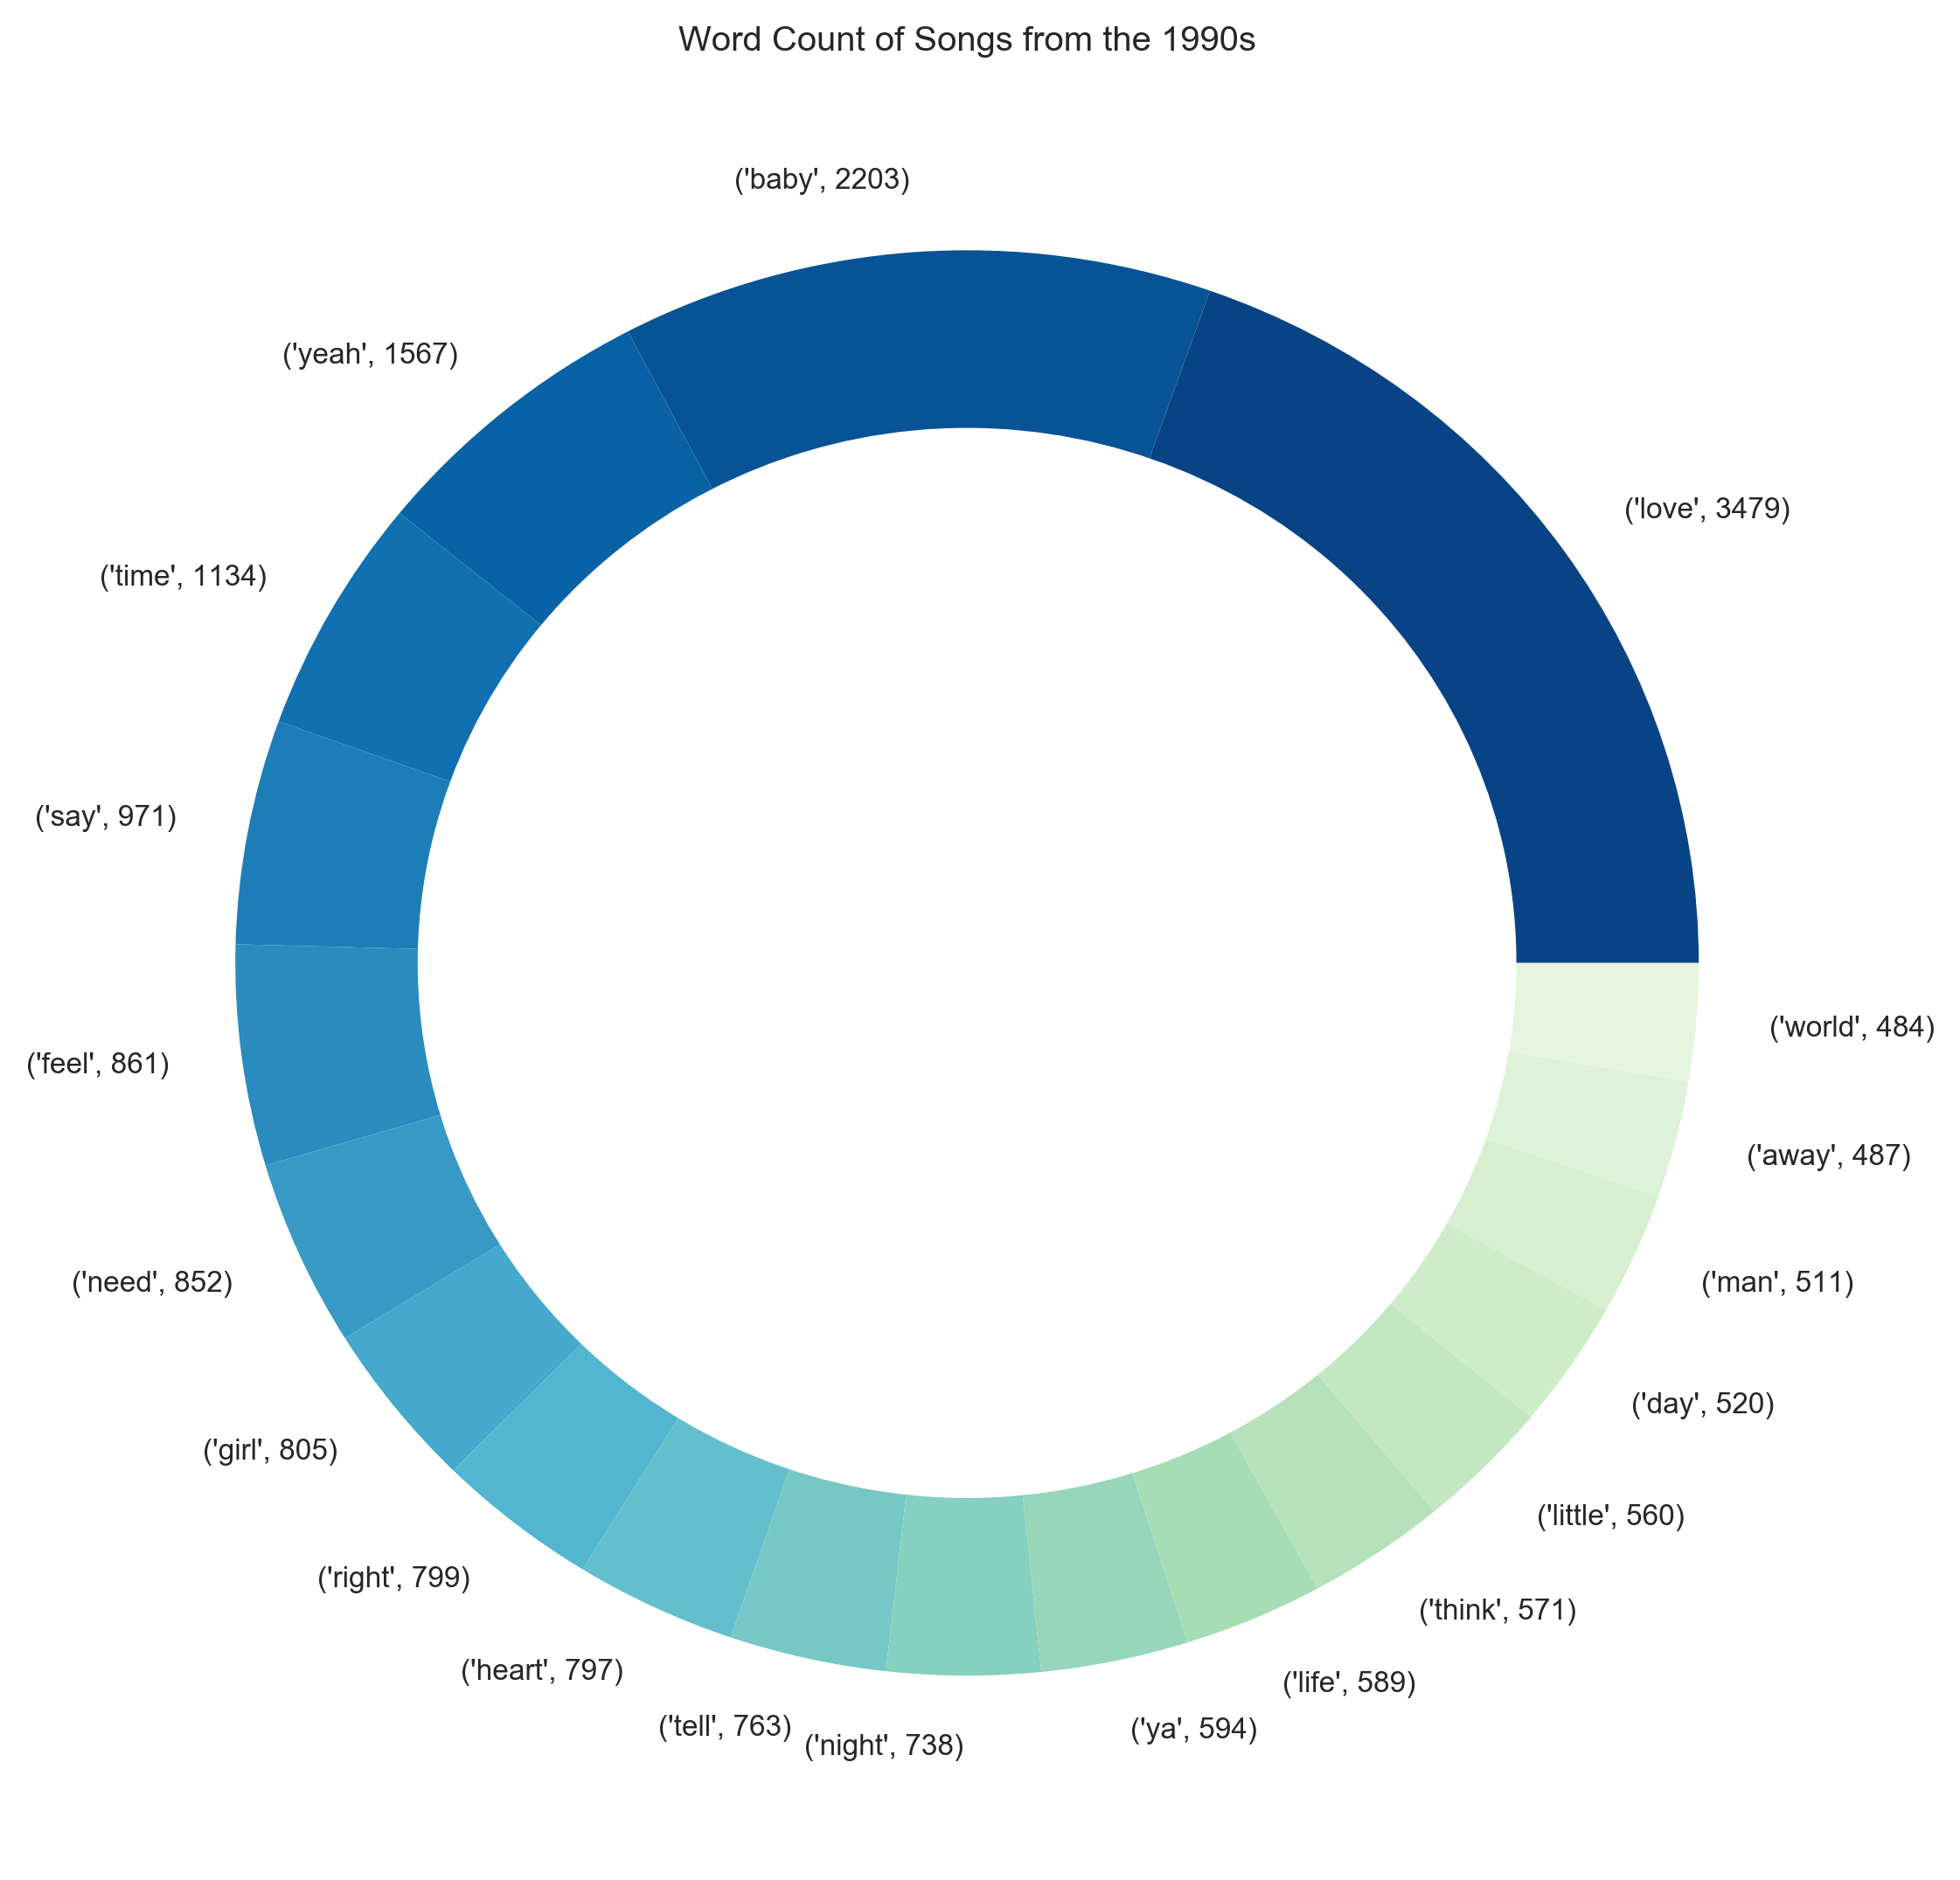

In [117]:
plot_donut(words4, count4, 1990)

In [109]:
NMF_topics(decade4lyrics, 10, 15)

Topic 0:
time say away think said life believe day change feel remember wrong world try stay
Topic 1:
na murderer nah rush di uhh hm lovely nana stepper lyrical gangster eh hmm justified
Topic 2:
love forever believe real hurt knew better right falling alright true changes dream goes ready
Topic 3:
baby gotta tonight wants babe body ooh boy til ecstasy hurt work minute sweet cuz
Topic 4:
yeah ah ooh doing hey crazy time feel tell saying dance repeat everybody funky god
Topic 5:
ya man shit yo little big gotta play yall niggaz money rock ride hit nigga
Topic 6:
da di set slam la lovely boys words everybody dee ii eh jumps boyz dance
Topic 7:
need girl man tell kind live life lover right look yes leave really think true
Topic 8:
night hold talk feel dream saw close miss sweet right heaven tight angel day eyes
Topic 9:
heart tell hold gave turn break world does apart door games beat somebody away playin


----
## 2000-2010

In [110]:
decade5lyrics = lyrics[lyrics['Year'].between(2000, 2009, inclusive=True)]['Lyrics'].values
decade5lyrics = [i for i in decade5lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv5 = cv.fit_transform(decade5lyrics)
cv_fn5 = cv.get_feature_names()

decade5LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=40, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv5)

show_sk_topics(decade5LDA, cv_fn5, 15)

Topic 0:
love hey say baby gone slow head ya real man girl gon ha girls world
Topic 1:
ya na wit la shit girl uh club nigga yo right hot shake em rock
Topic 2:
love baby girl time yeah say need life right tell feel think night said better
Topic 3:
boy ooh ah big wee yea clean money flip fresh air new freak ur work
Topic 4:
dance ay bum music bay body floor di night hump ya turn dj ti bedum
Topic 5:
da away walk goes try fly waiting ba world rain wings pretty sun duh loved


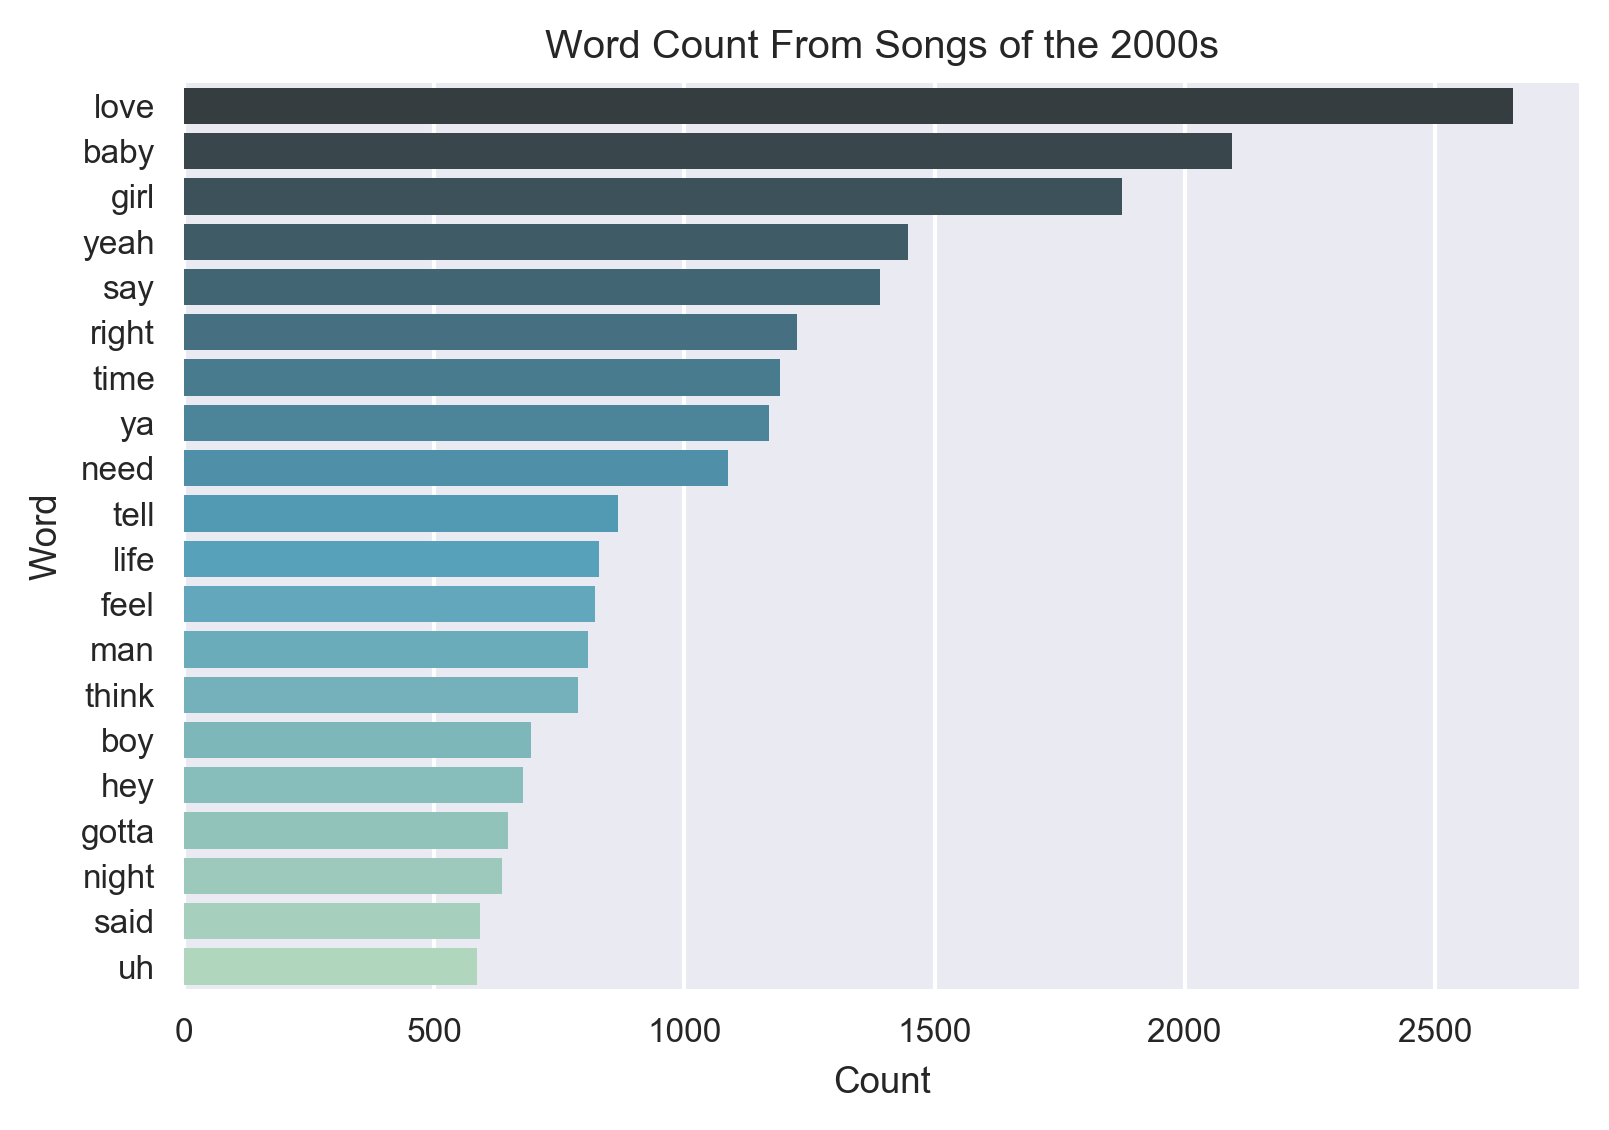

In [116]:
words5, count5 = top_20_words(cv5, cv_fn5)
plot_top_20(words5, count5, 2000)

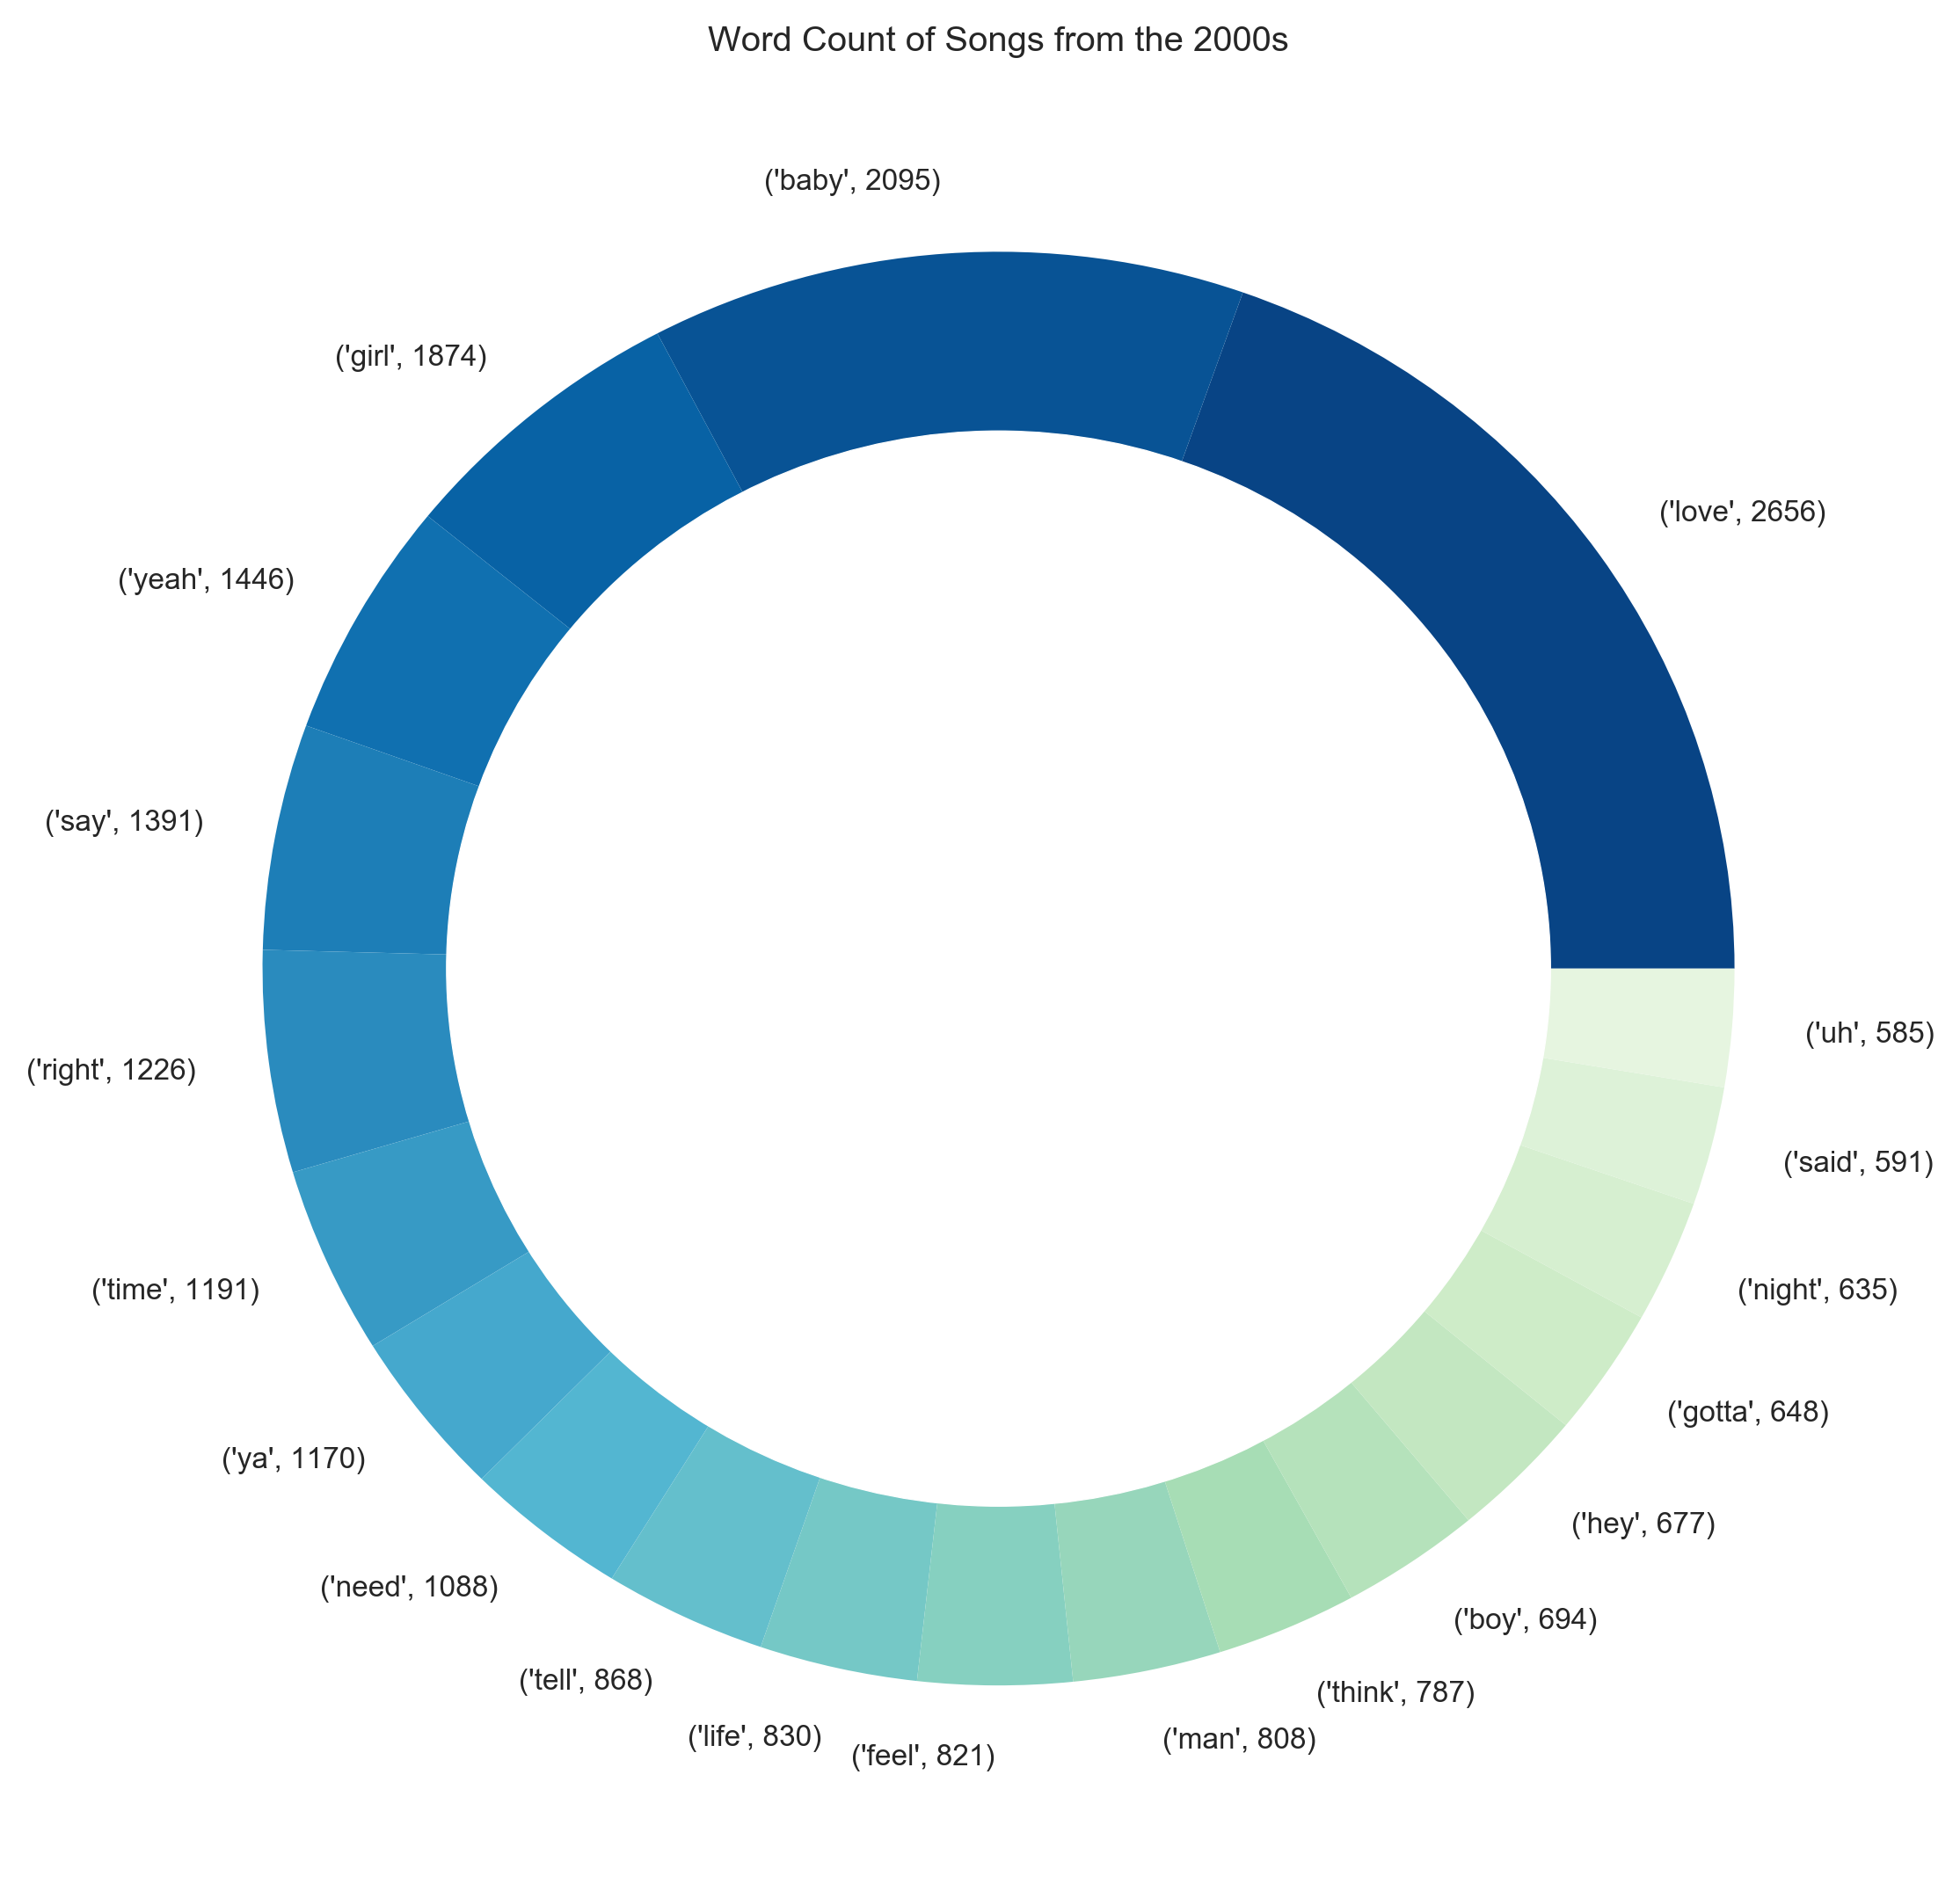

In [115]:
plot_donut(words5, count5, 2000)

----
## 2010-2015

In [118]:
recent_lyrics = lyrics[lyrics['Year'].between(2010, 2015, inclusive=True)]['Lyrics'].values
recent_lyrics = [i for i in recent_lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv6 = cv.fit_transform(recent_lyrics)
cv_fn6 = cv.get_feature_names()

recent_LDA = LatentDirichletAllocation(n_components=10, 
                                       batch_size=75, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv6)
show_sk_topics(recent_LDA, cv_fn6, 15)

Topic 0:
bottoms eh throw girls coco bang yo cup drank girl uh aye ya huh love
Topic 1:
love hard yeah run say boom baby fall gotta look said heart away think boy
Topic 2:
la na clap feel girl tu happy world nana que boy ohohohoh floor gusta ey
Topic 3:
rock night yeah body going hitta wiggle right dance fly hands drink head look moves
Topic 4:
hey say whoa heart baby break lie aah uh remember time tonight yeah nothin better
Topic 5:
love feel bad need heart life baby burn eyes deep place time girl hear think
Topic 6:
op gangnam chick style sexy met girl hey bad lady wish kind better rolling smack
Topic 7:
baby yeah girl ooh time tell need right night life em bout turn shake feel
Topic 8:
bitch fuck nigga shit niggas low right think bitches money new city ass little real
Topic 9:
worth trouble die demons till young safe sound says words aaaaohohhhhh aaaaaaaohohohoh away beat love


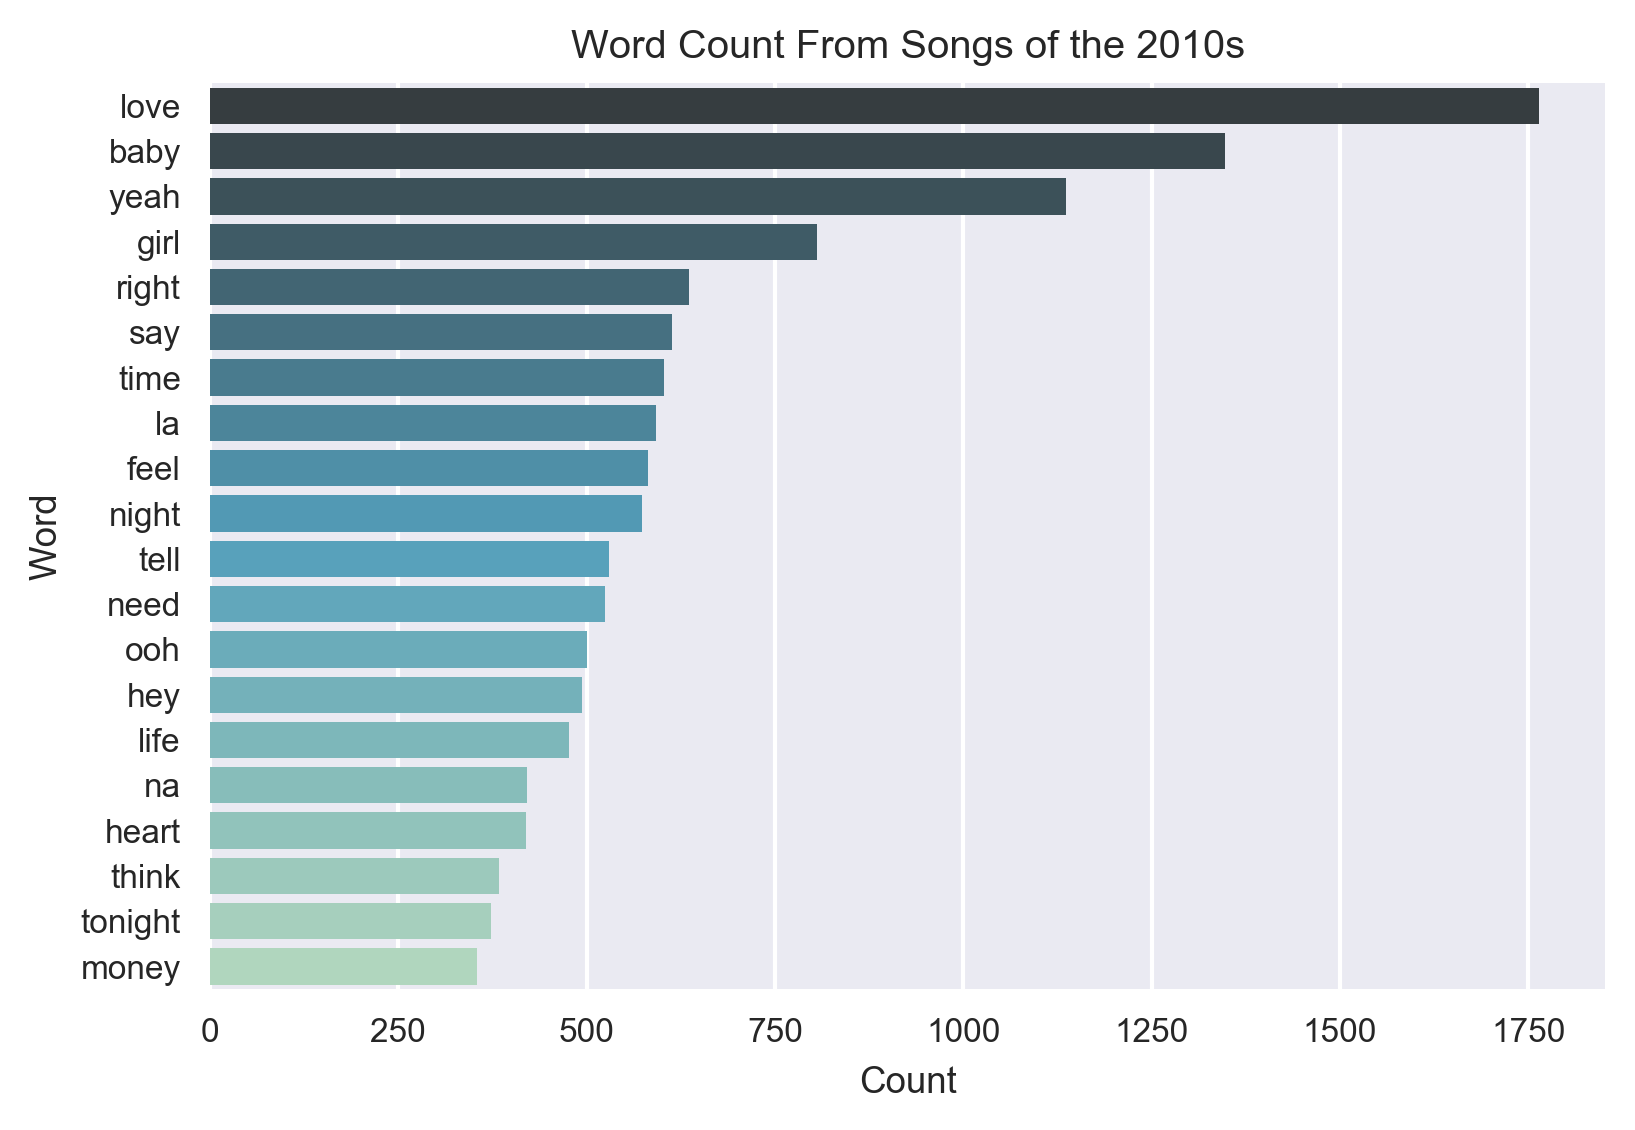

In [119]:
words6, count6 = top_20_words(cv6, cv_fn6)
plot_top_20(words6, count6, 2010)

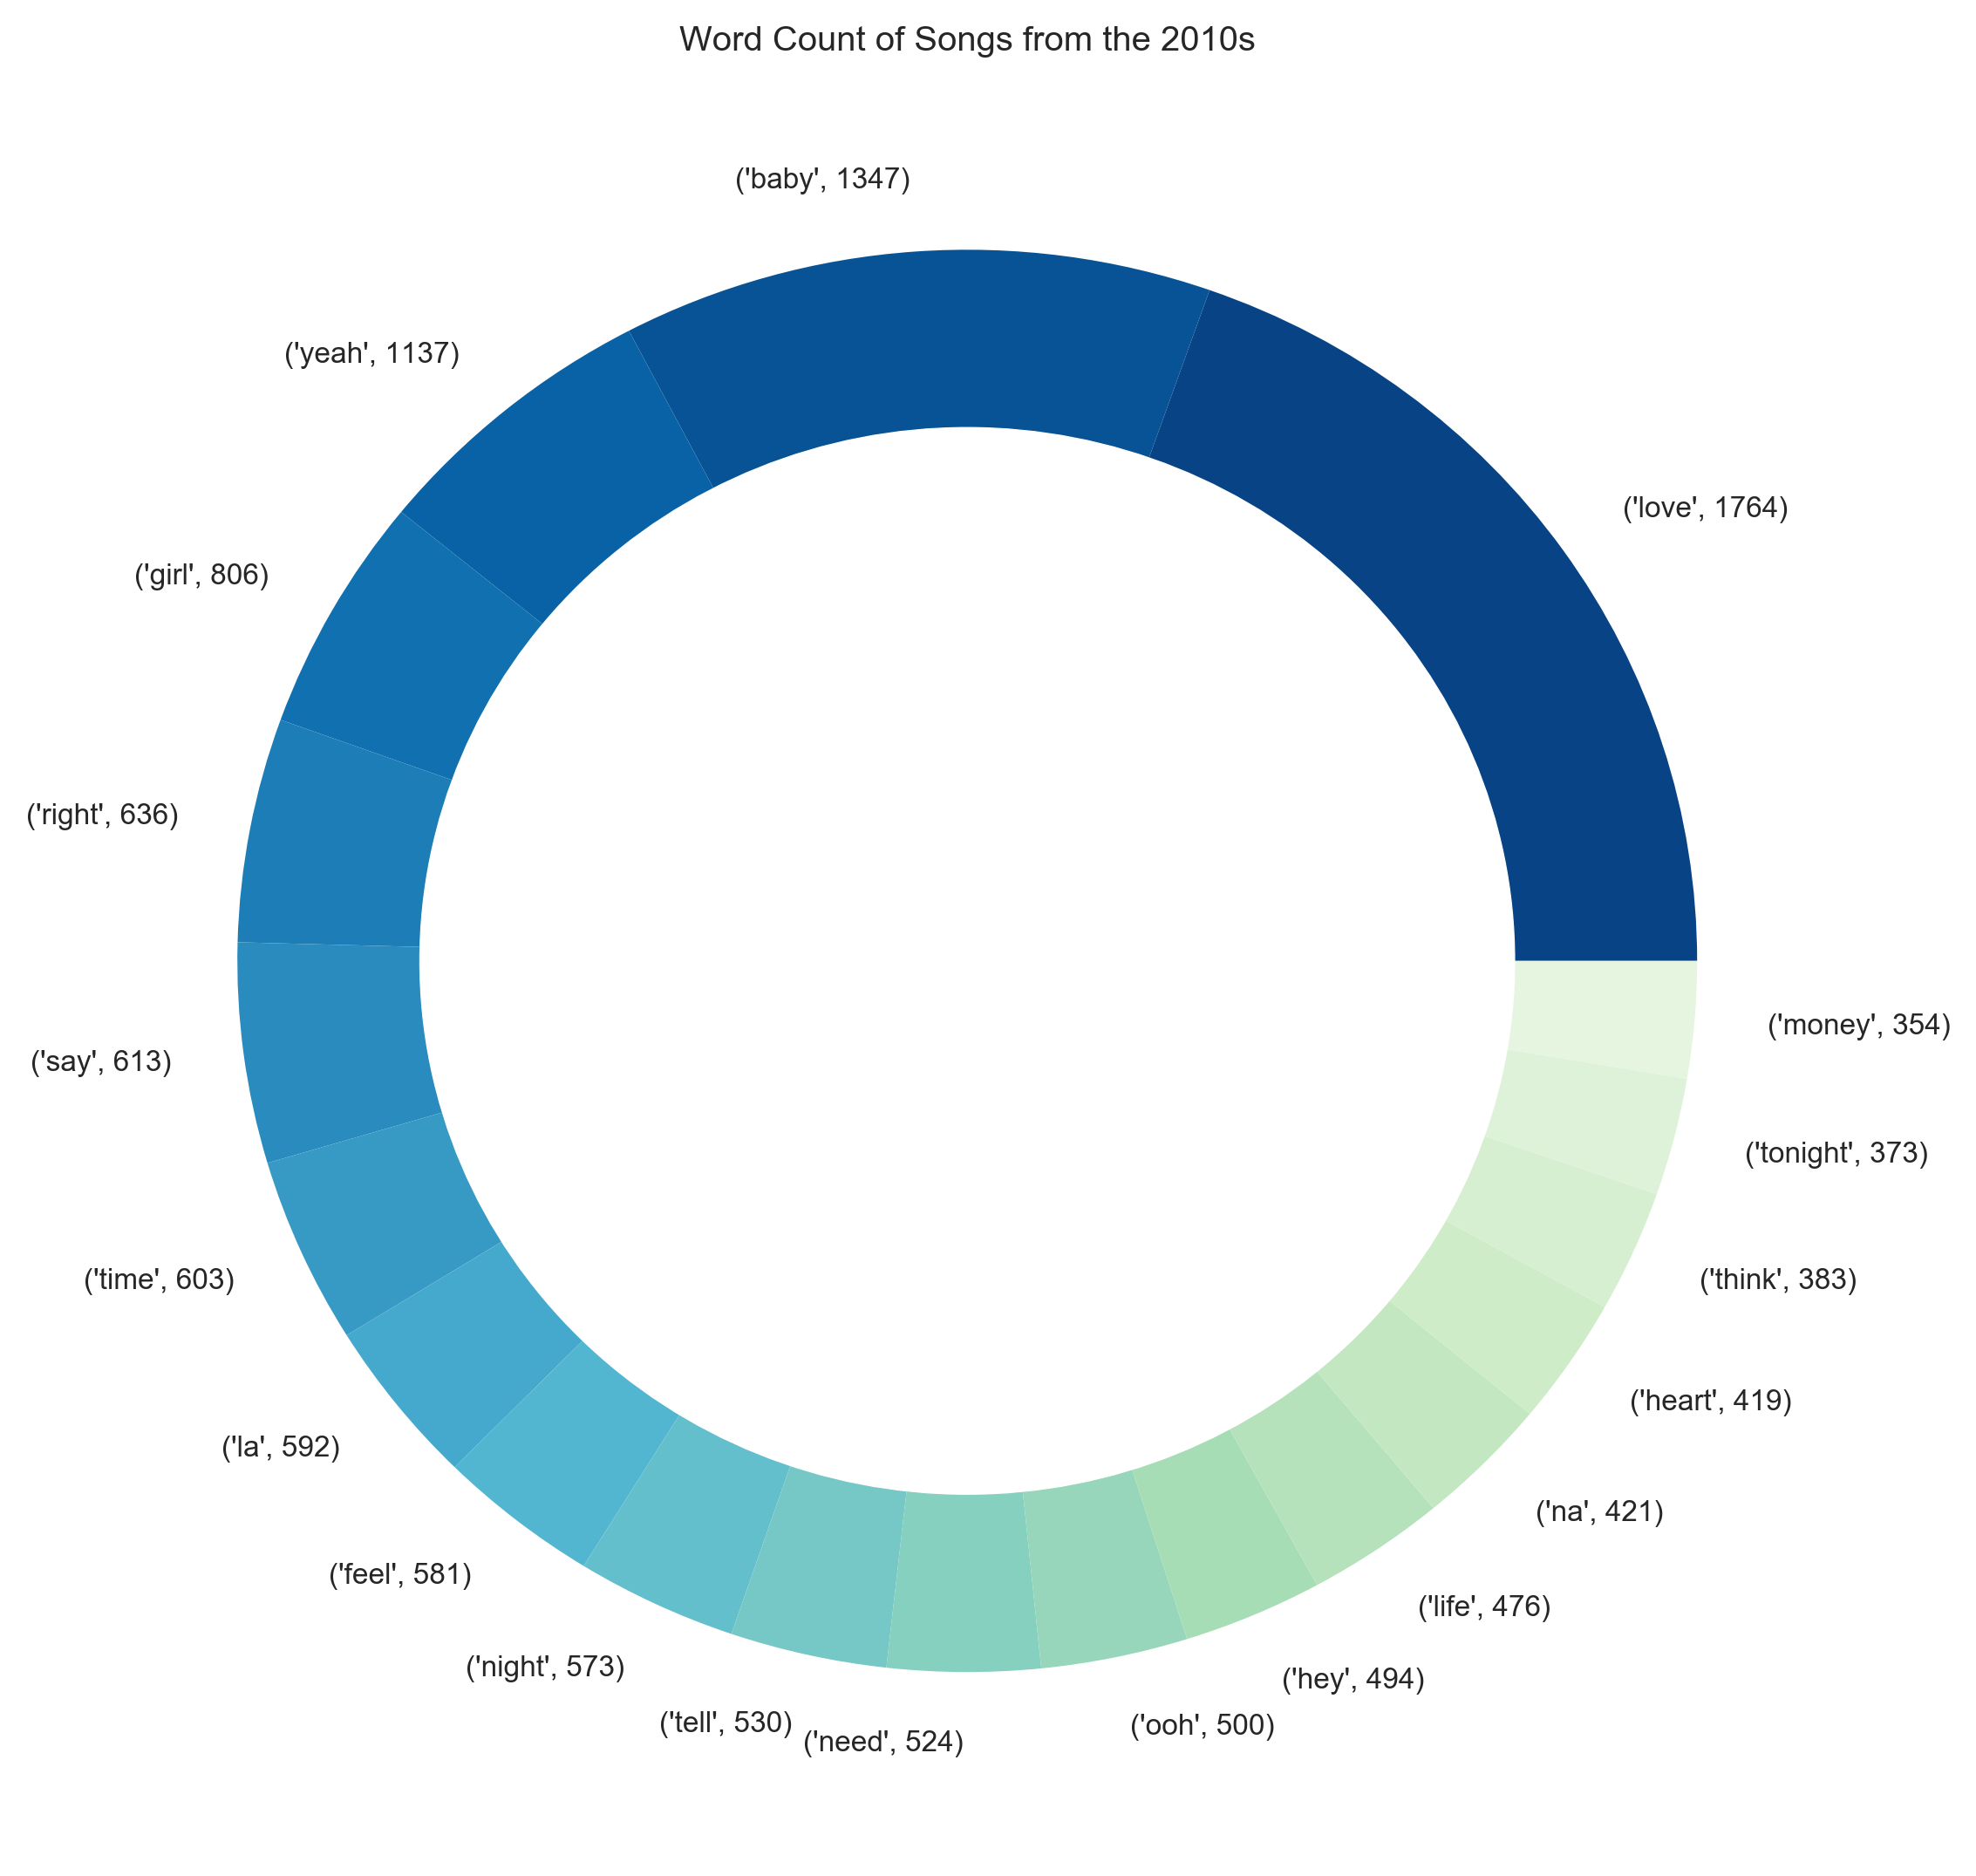

In [120]:
plot_donut(words6, count6, 2010)

## The Frequency of Love across each year

In [401]:
removed_null_lyrics = lyrics[lyrics['Lyrics'].notnull()]

tokens = []
for i in removed_null_lyrics['Lyrics']:
    tokens.append([word.lower() for sent in nltk.sent_tokenize(i) for word in nltk.word_tokenize(sent)])

In [ ]:
removed_null_lyrics['Tokenized Lyrics'] = tokens

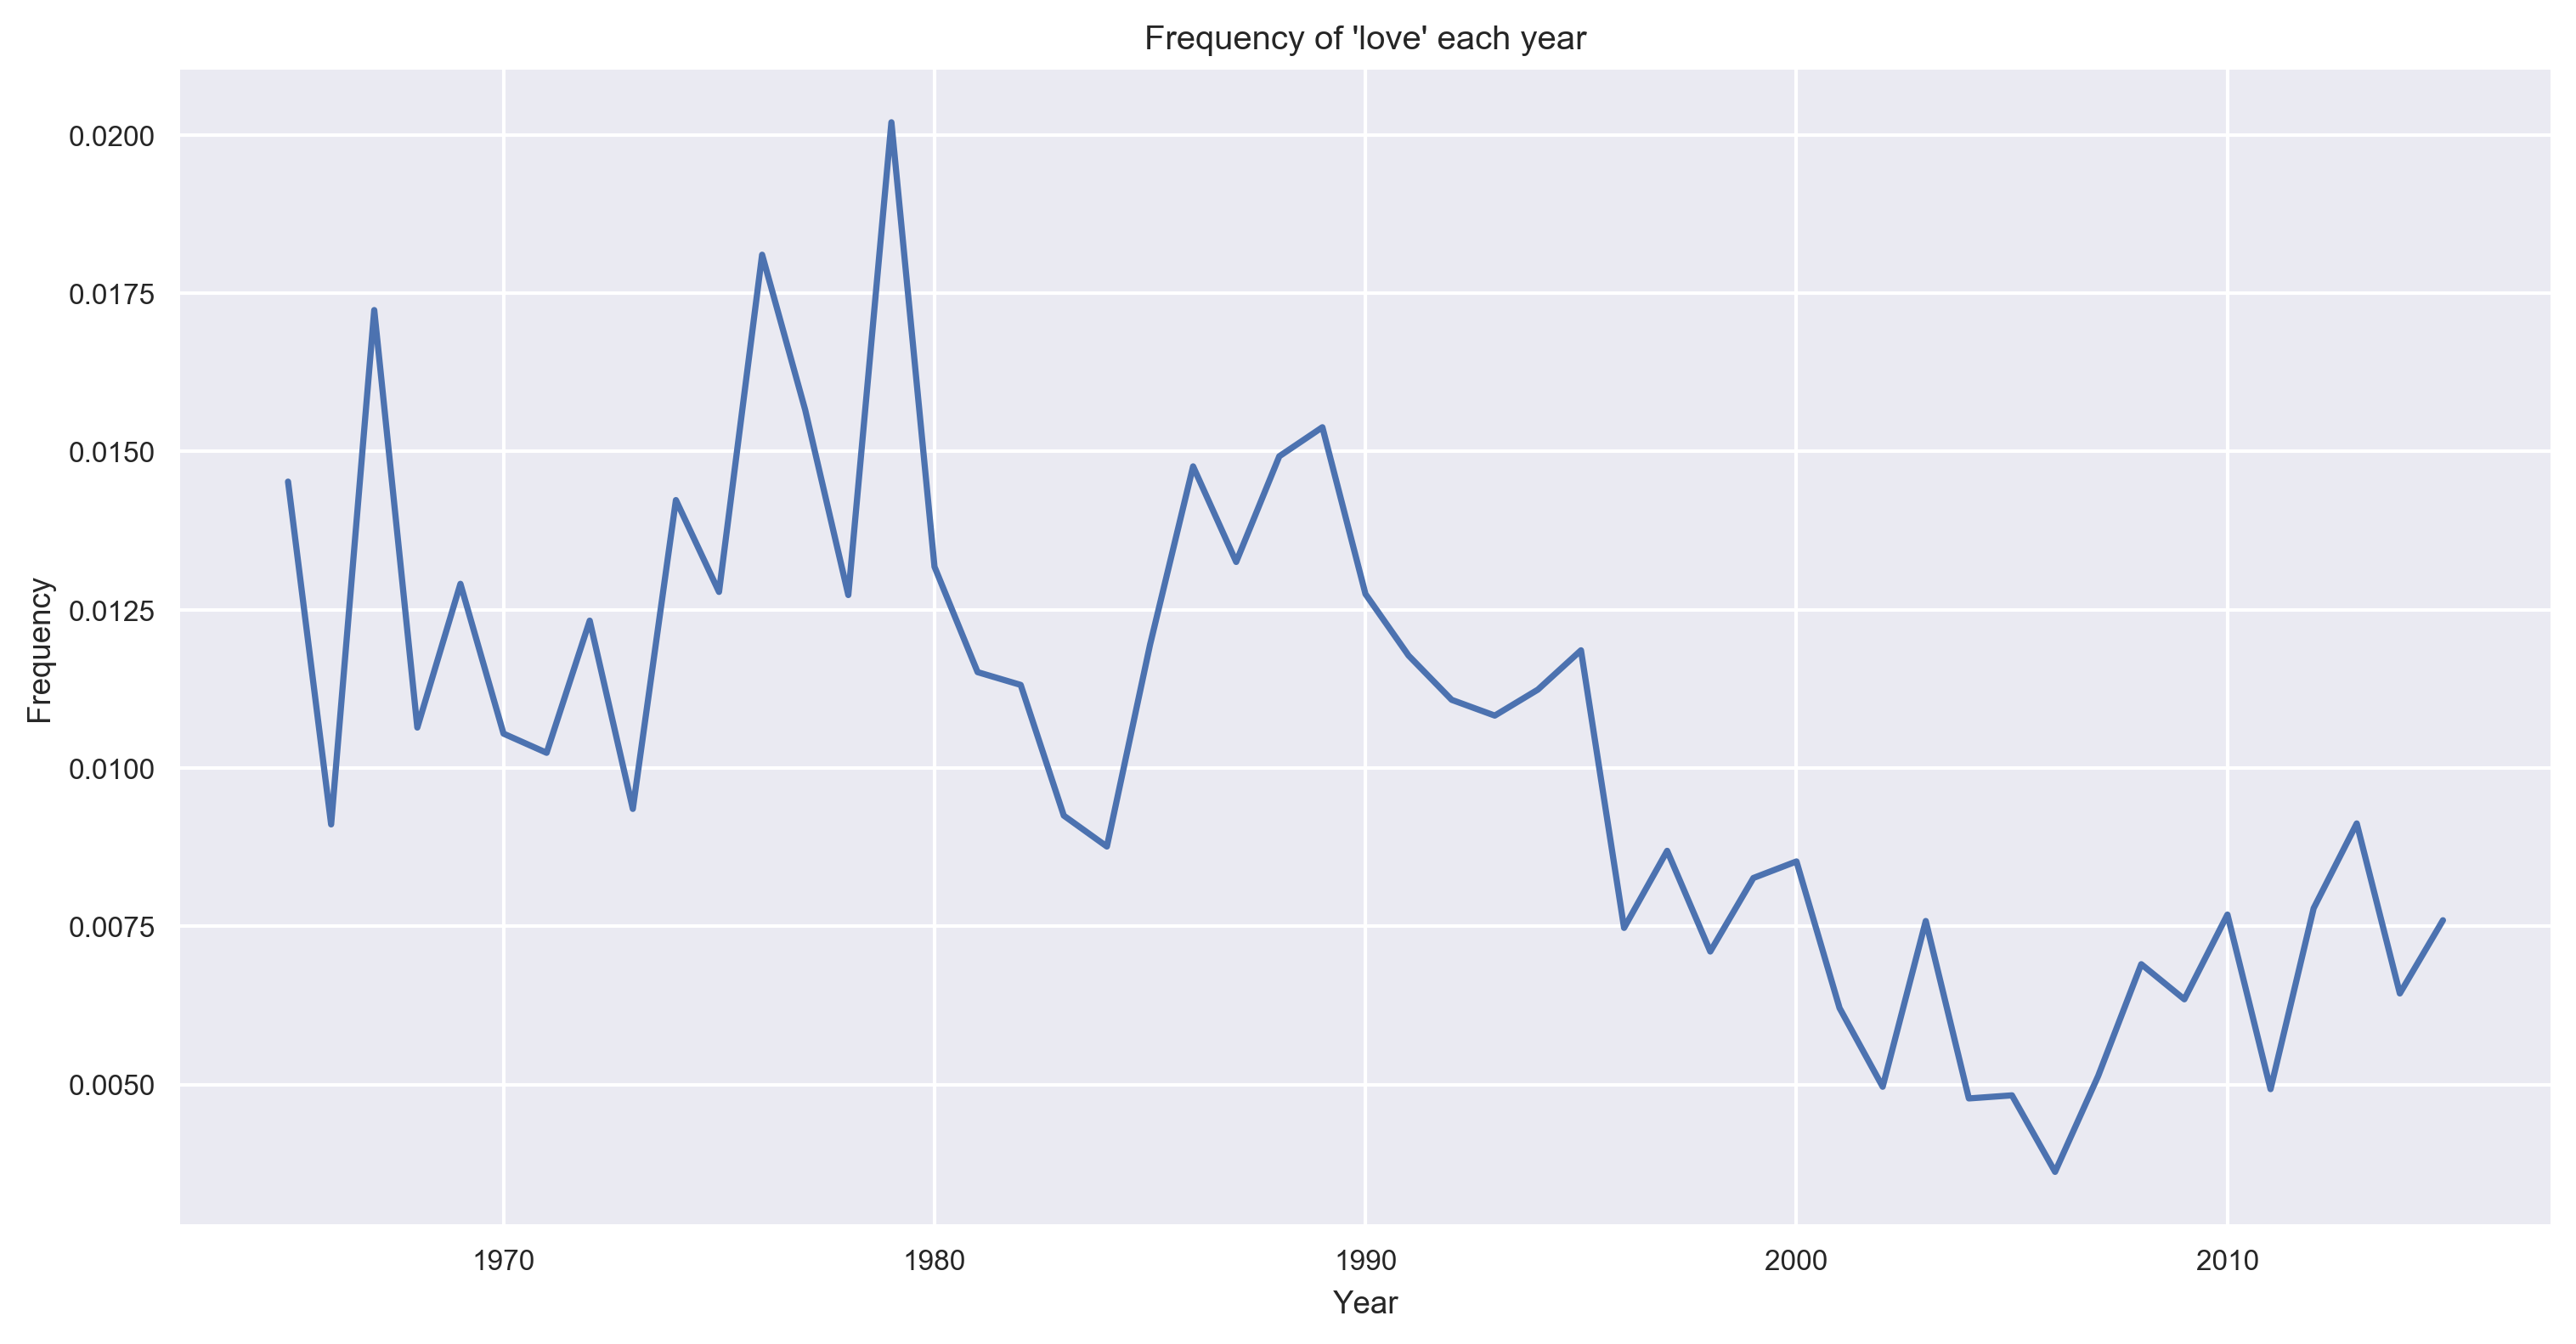

In [399]:
for_indexing =[]
for i in  removed_null_lyrics['Tokenized Lyrics'].values:
    if len(i) > 0:
        for_indexing.append(True)
    else:
        for_indexing.append(False)
only_w_lyrics = removed_null_lyrics[for_indexing]

year_freq = {}
for i in np.arange(1965, 2016):
    counts = 0
    length_song = 0
    lyrics_year = only_w_lyrics[only_w_lyrics['Year'] == i]['Tokenized Lyrics'].values
    for song in lyrics_year:
        counts += np.count_nonzero(np.asarray(song) == 'love')
        length_song += len(song)
    year_freq[i] = counts / length_song
    
year = []
freq = []
for yr, f in year_freq.items():
    year.append(yr)
    freq.append(f)
love_freq = pd.DataFrame(data={'Year': year, 'Frequency': freq})[['Year', 'Frequency']]

plt.figure(dpi=300, figsize=(12, 6));
plt.plot(love_freq['Year'].values, love_freq['Frequency'].values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Frequency of 'love' each year")
plt.show();

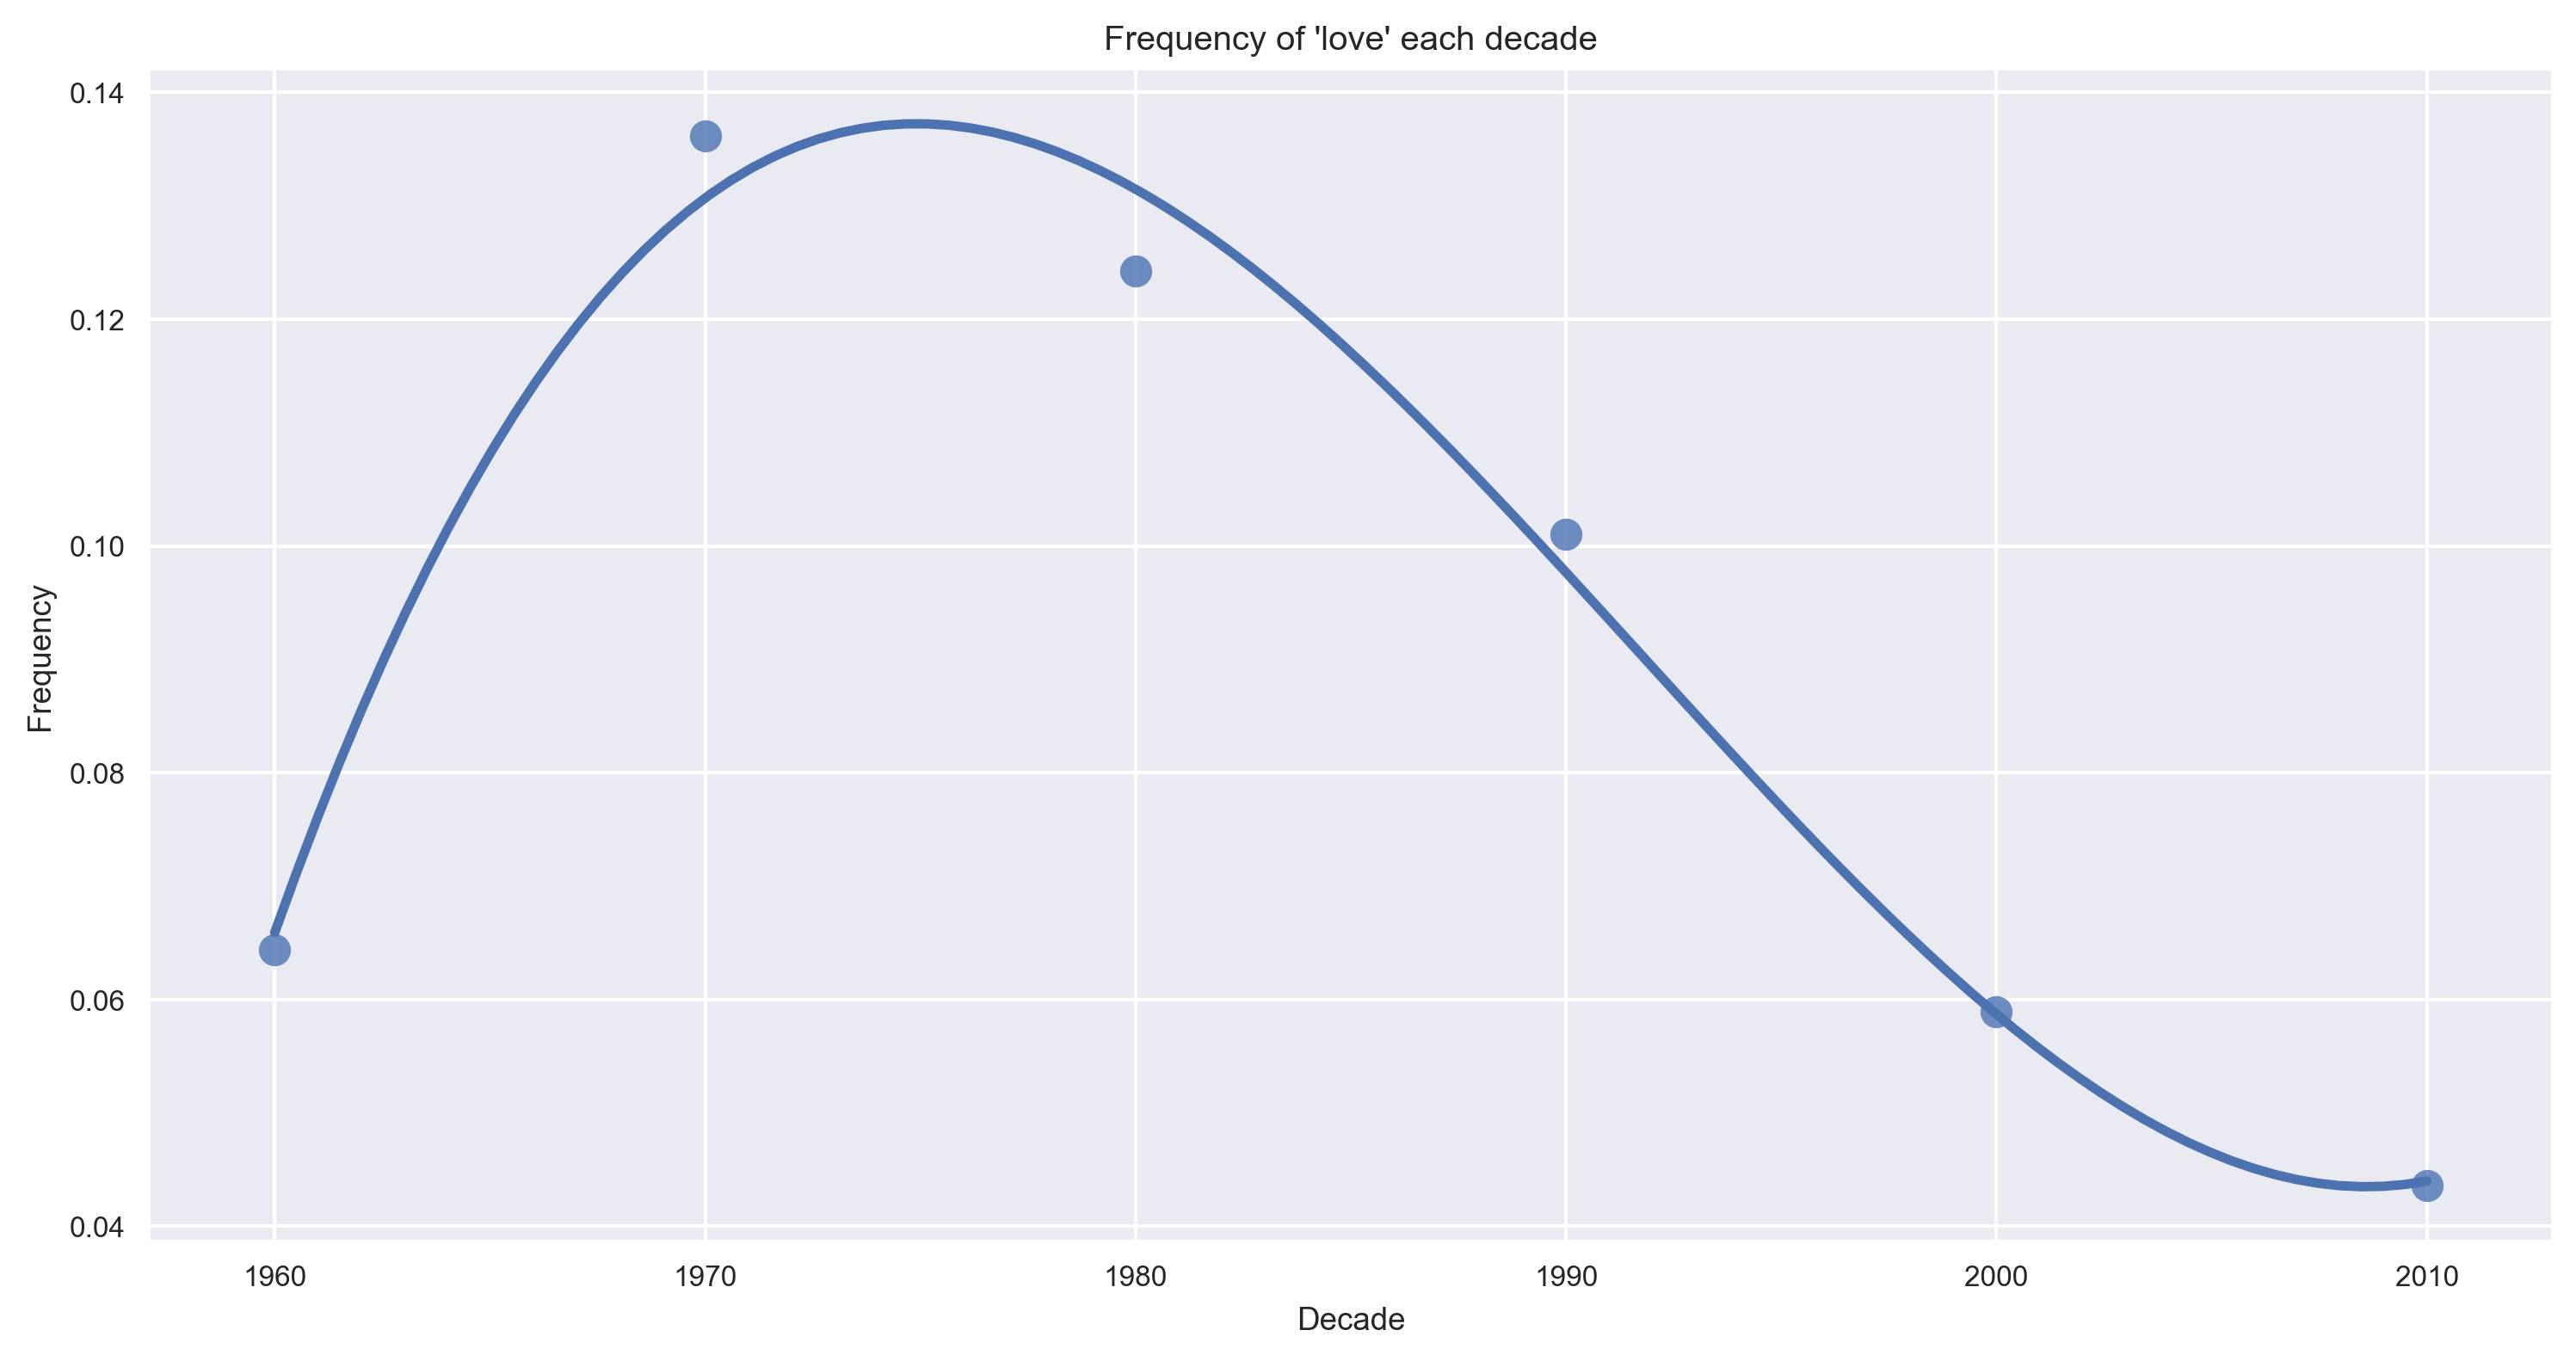

In [400]:
initial = 6
decade_freq = {6:0}
for i in love_freq['Year'].values:
    if i % 100 // 10 != initial:
        initial = i % 100 // 10
        decade_freq[initial] = love_freq[love_freq['Year'] == i]['Frequency'].values[0]
    else:
        decade_freq[initial] = decade_freq[initial] + love_freq[love_freq['Year'] == i]['Frequency'].values[0]

decade = []
freq = []
for k, v in decade_freq.items():
    decade.append(k)
    freq.append(v)
decade = [i * 10 for i in decade]
decade = [i + 1900 for i in decade[:4]] + [i + 2000 for i in decade[4:]]
love_freq_decade = pd.DataFrame(data={'Decade':decade, 'Frequency': freq})

plt.figure(dpi=300, figsize=(12, 6));
plt.title("Frequency of 'love' each decade")
sns.regplot(x='Decade', y='Frequency', data=love_freq_decade,
                scatter_kws={"s": 80},
                order=3, ci=None, truncate=True);

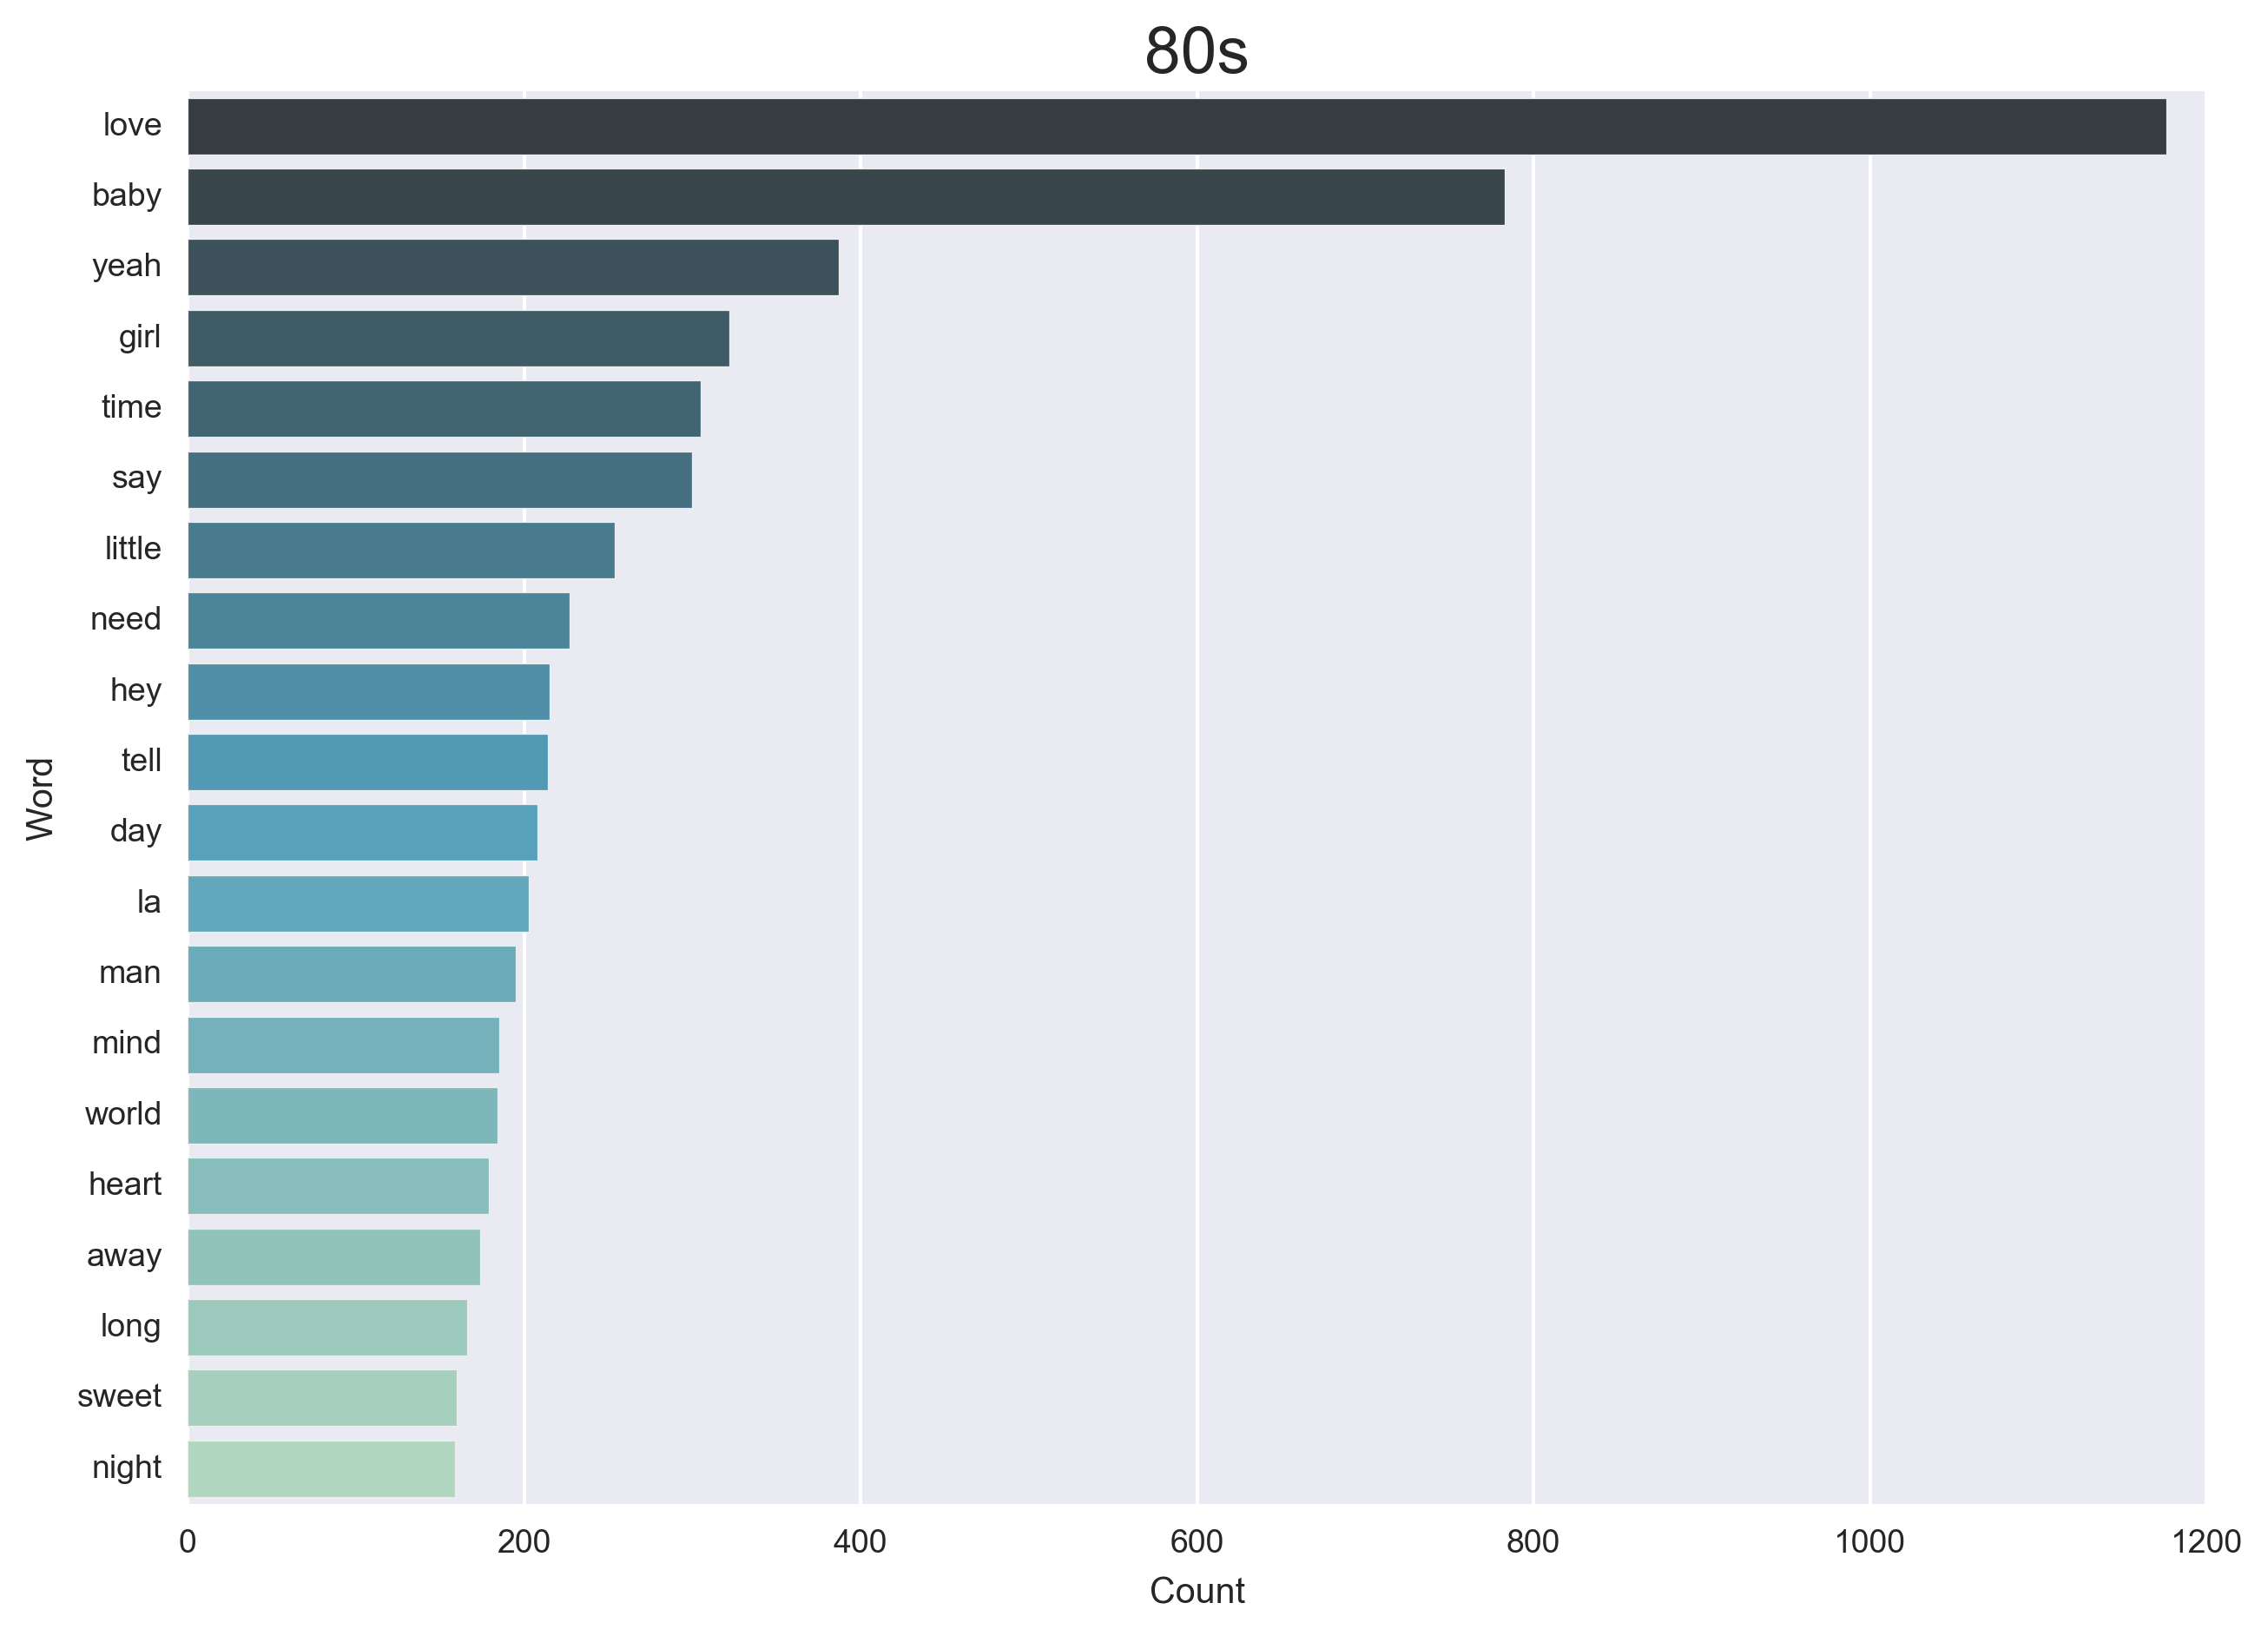

In [346]:
####Backup code for bar charts.
plt.subplots(figsize=(10,7), dpi=300)
sns.set(font_scale=1.5)

sorted_words1 = sorted(list(zip(cv_fn1, np.asarray(cv1.sum(axis=0)).ravel())), key=lambda x: x[1], reverse=True)
words, count = [i[0] for i in sorted_words1], [i[1] for i in sorted_words1]
top_words1 = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
plt.title('80s')
sns.barplot(x = top_words1['Count'], y=top_words1['Word'], palette=("GnBu_d"));